<a href="https://colab.research.google.com/github/MarvinCharles/Data-Science/blob/main/Marvin_Charles_Stats_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

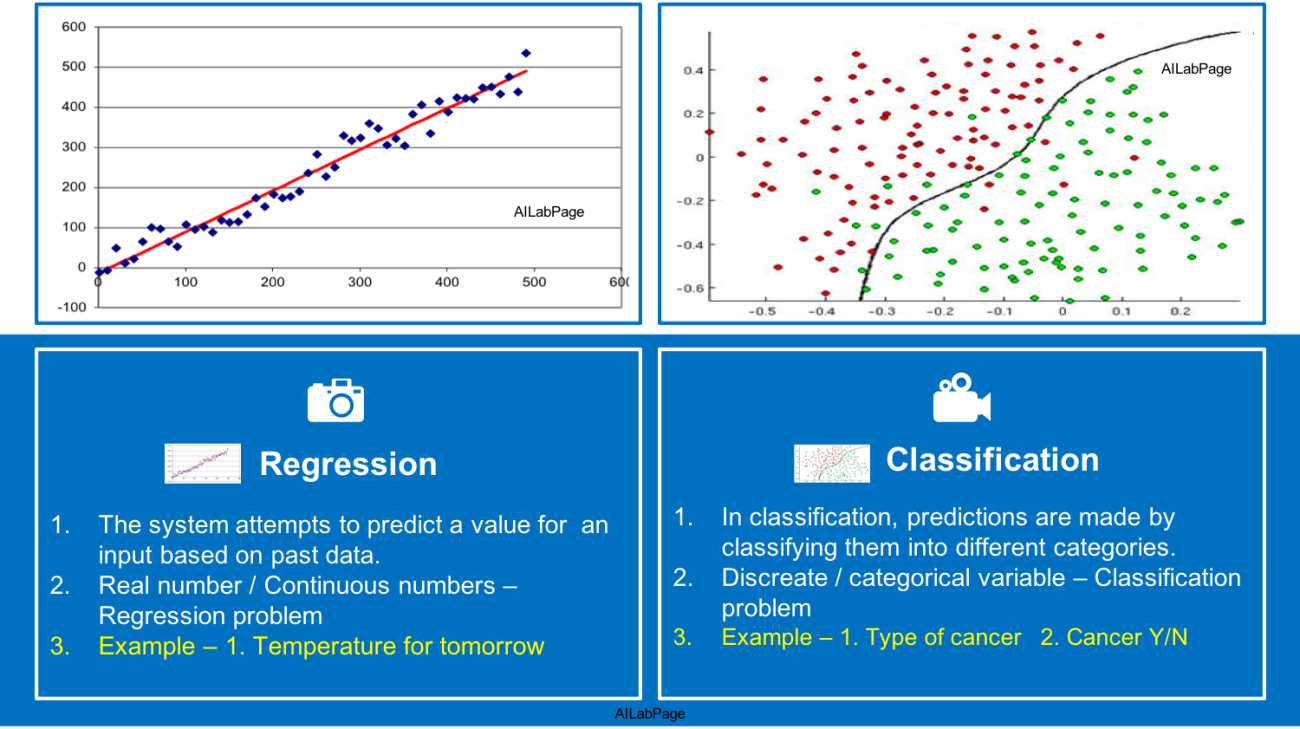

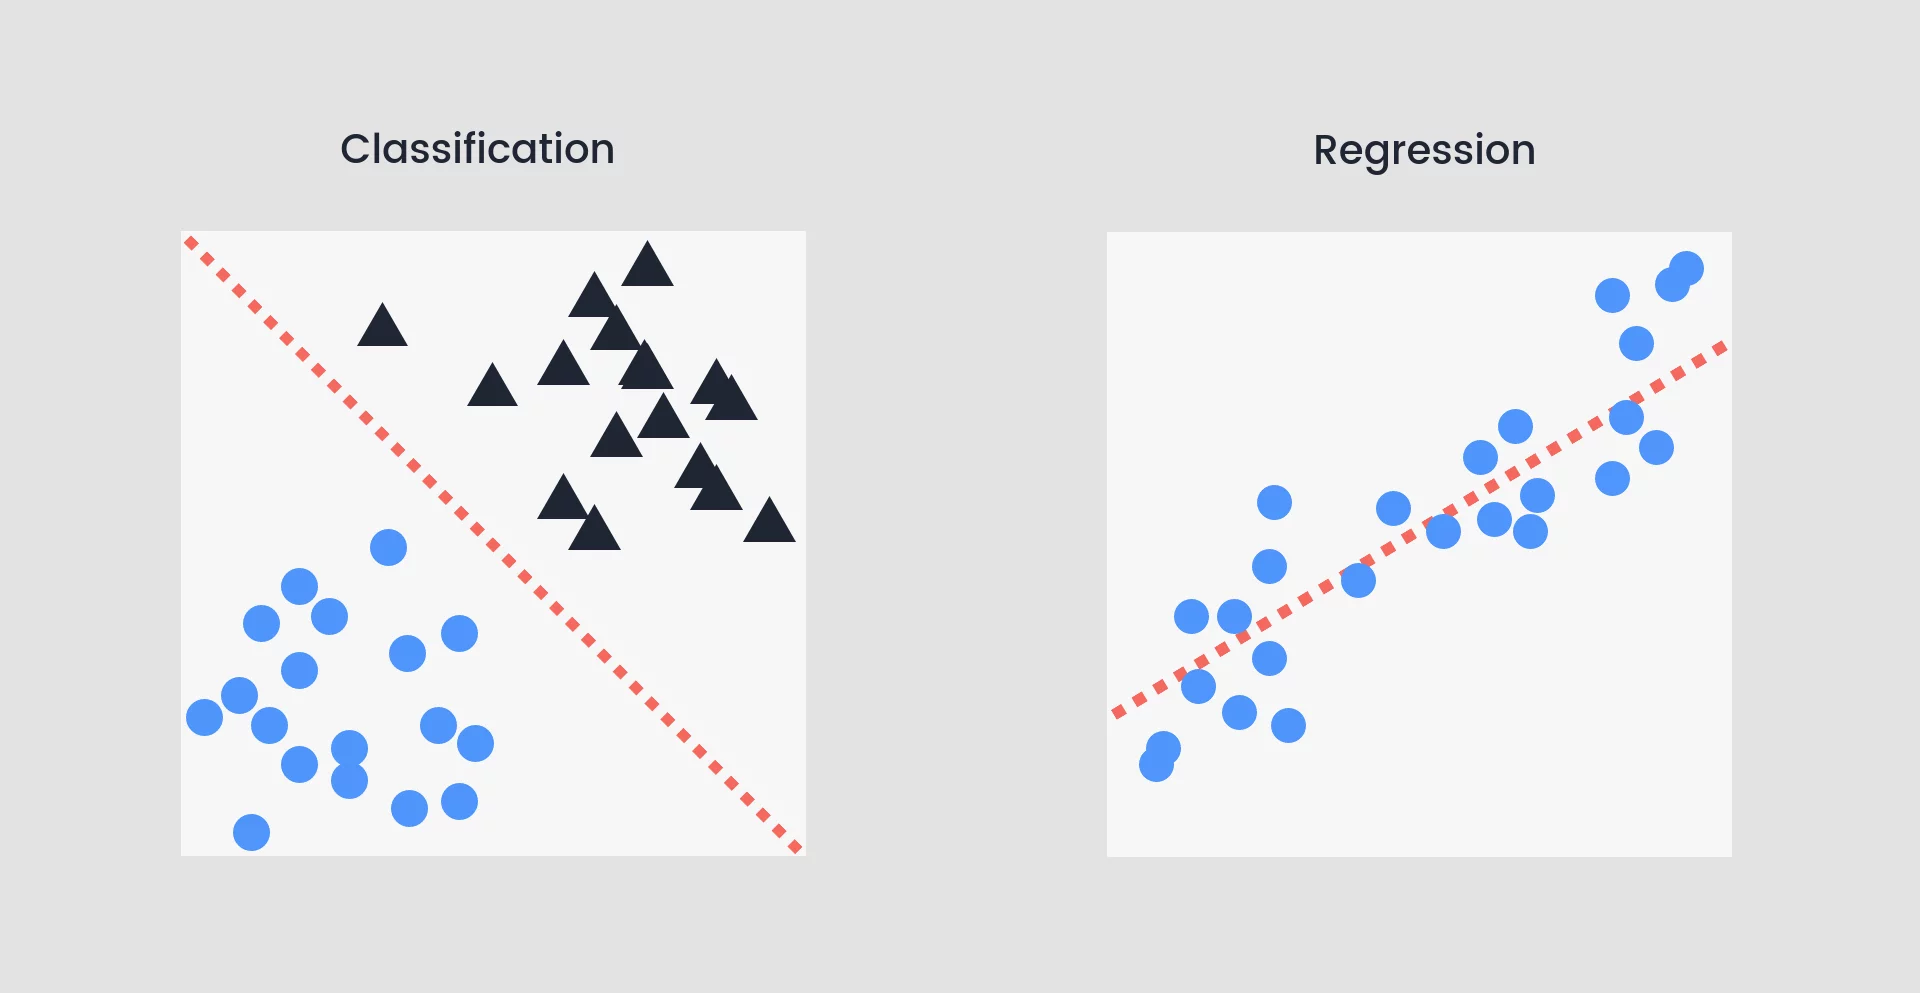

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

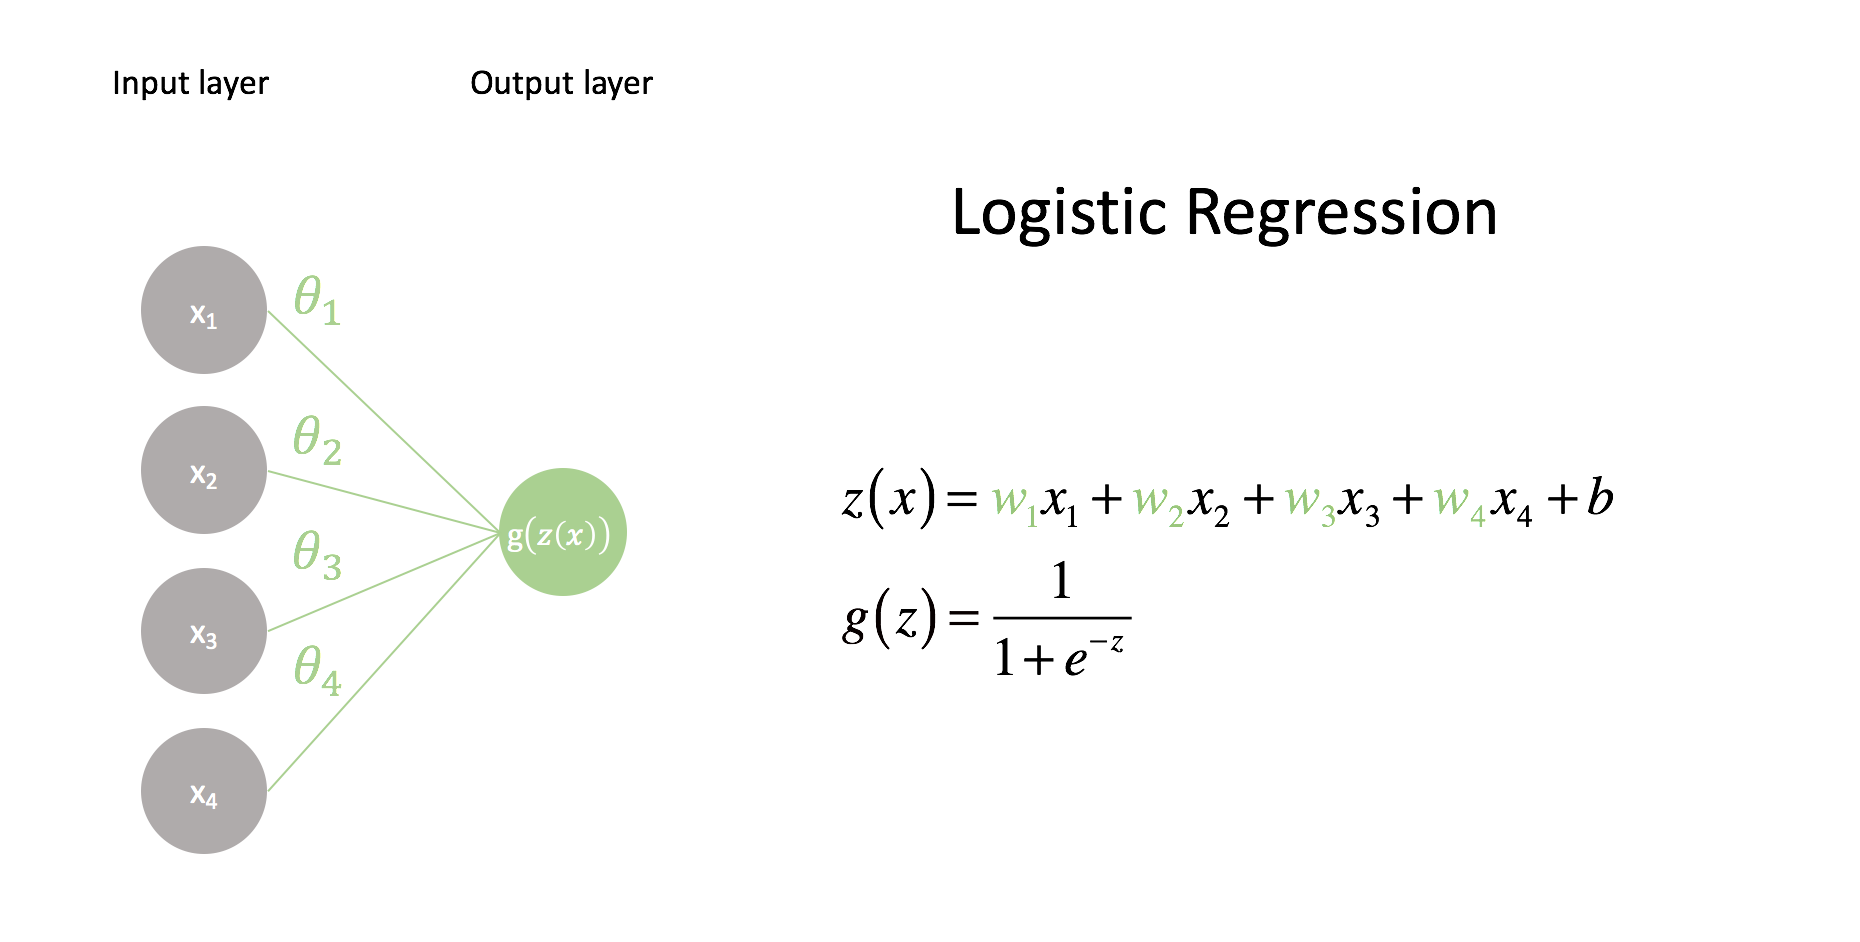

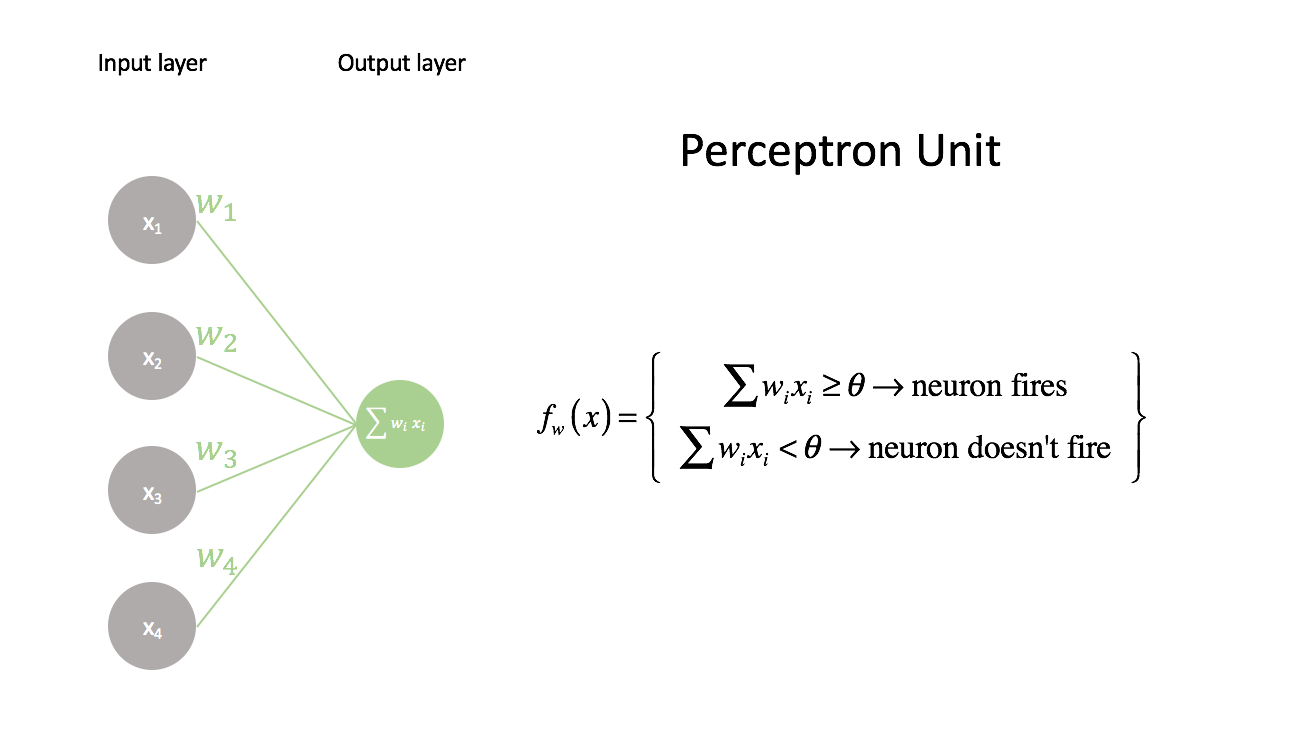

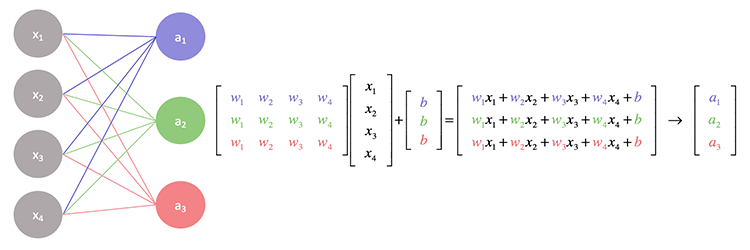

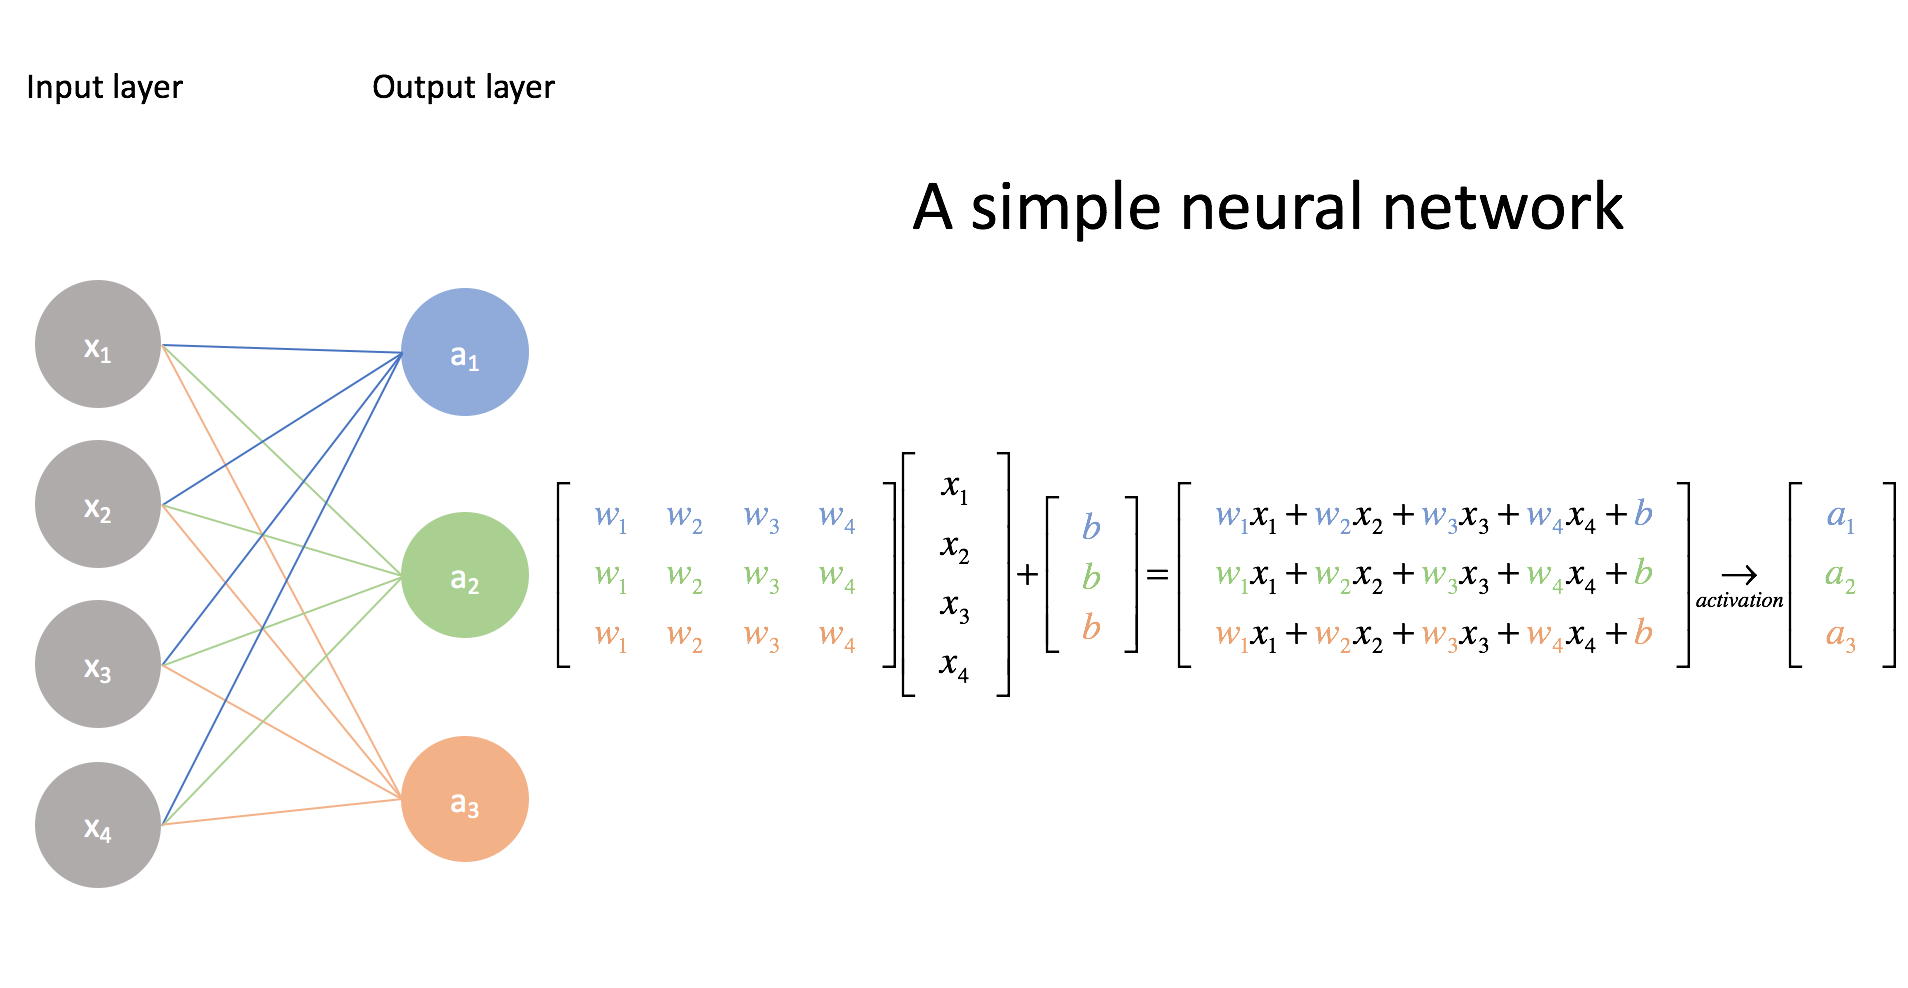

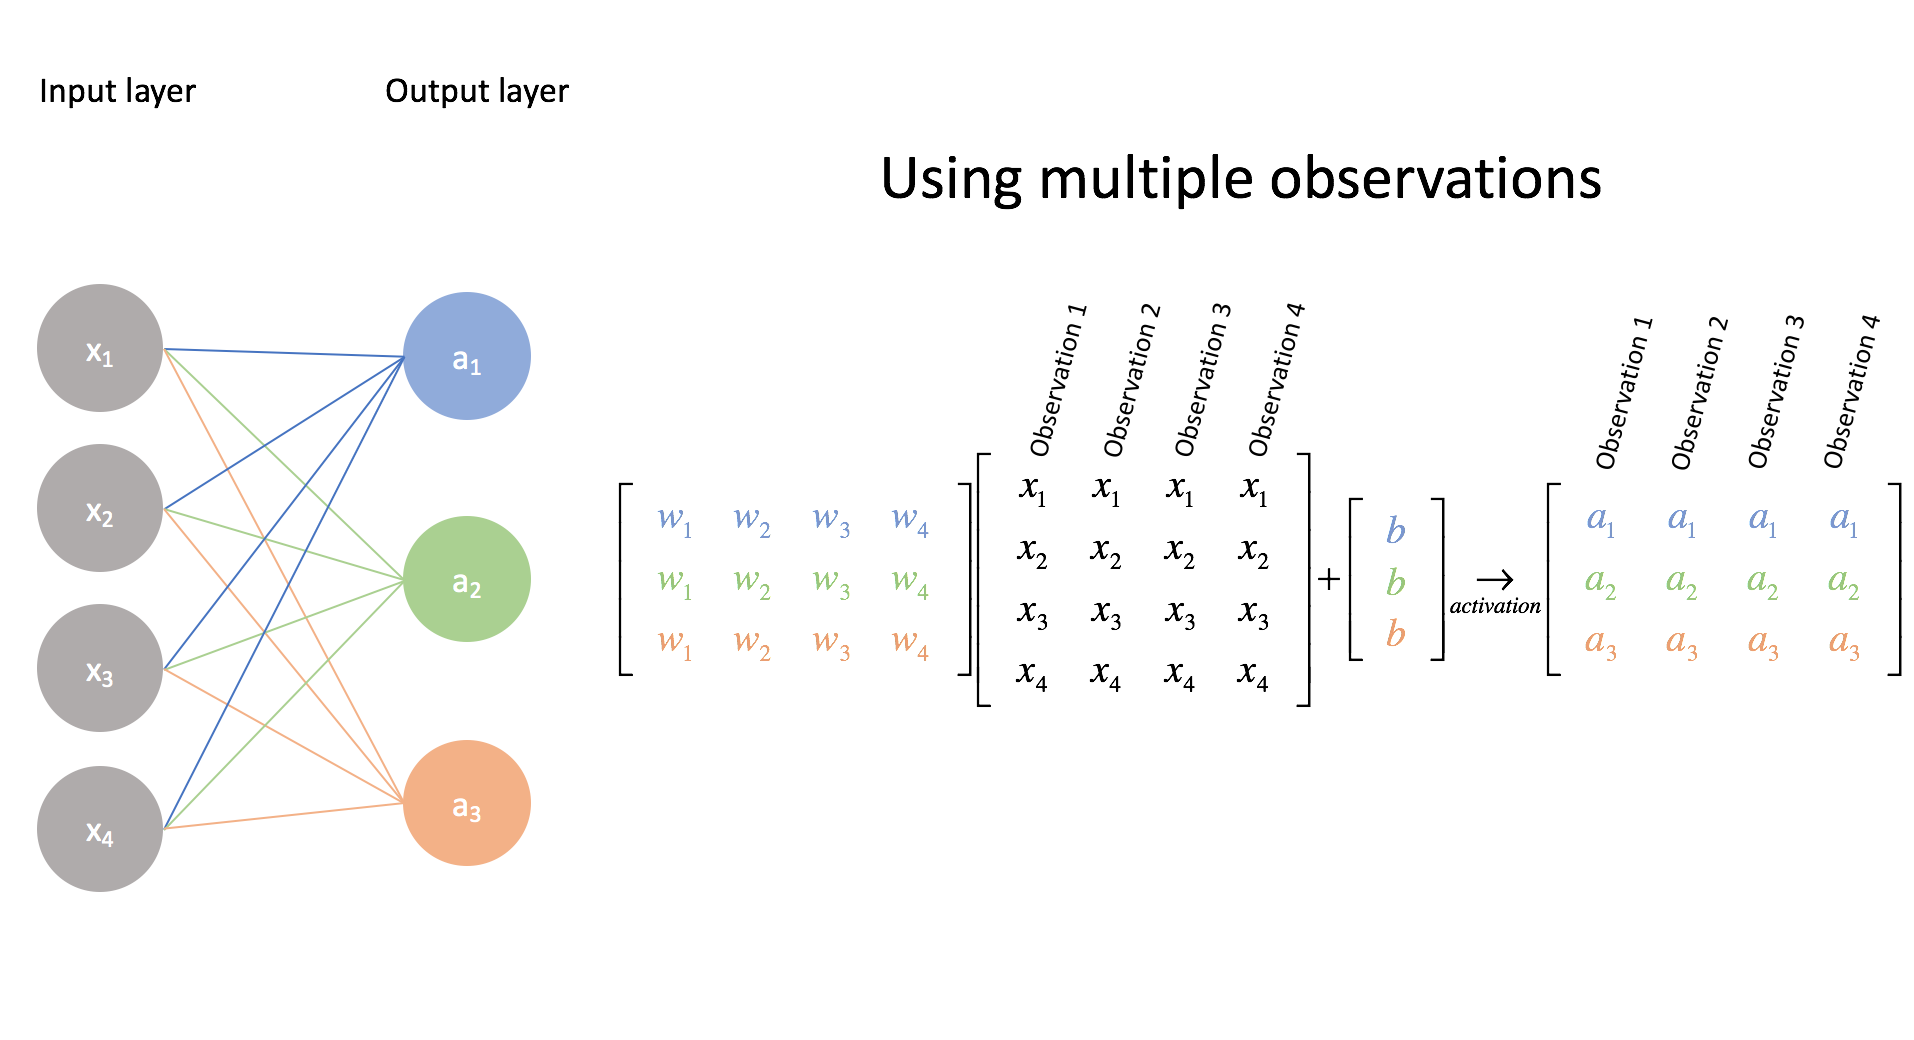

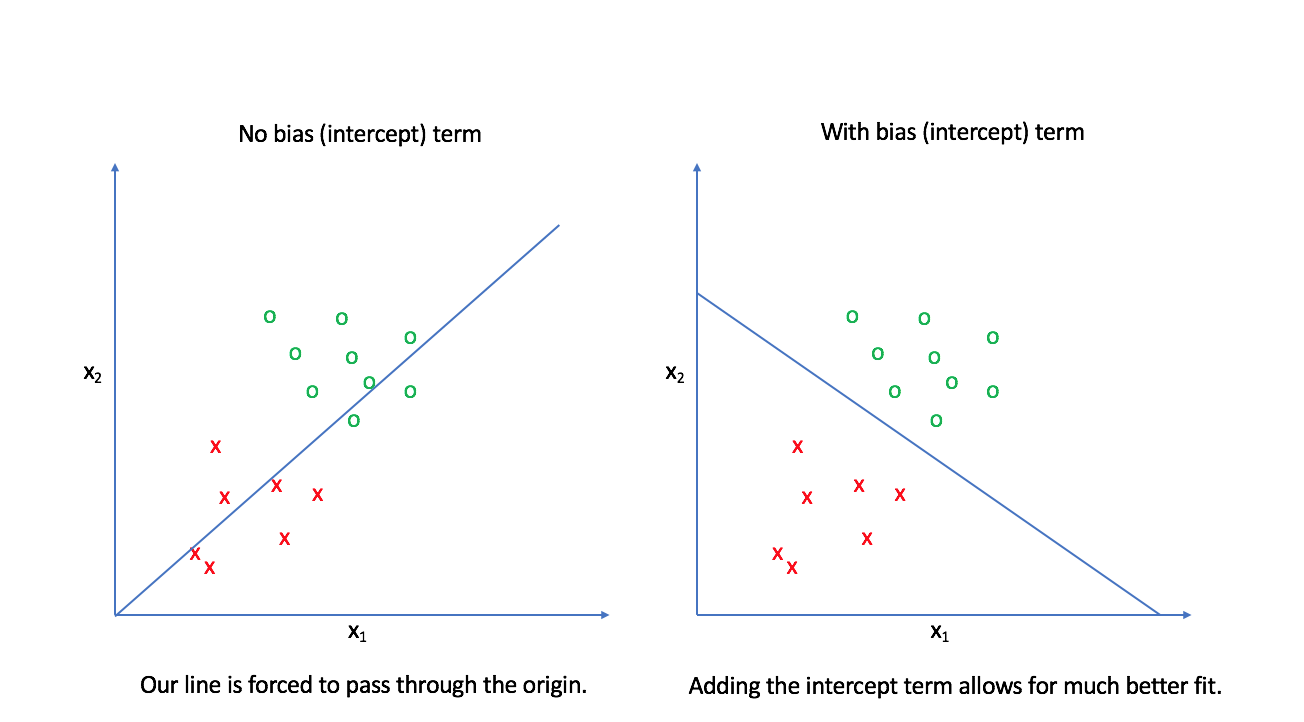

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-ye5vdcr9
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-ye5vdcr9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [ ]:
x = np.arange(0,9)

In [ ]:
x.shape

(9,)

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(9, 1)

In [ ]:
y = 3*x-5

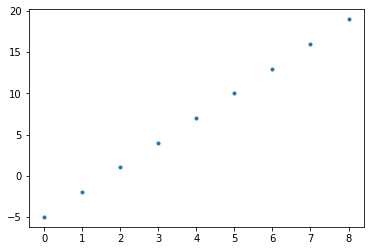

In [ ]:
plt.plot(x,y,'.')

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 956.4871826171875 0.7720729112625122 0.8131585717201233
1 384.2286071777344 1.2625198364257812 0.8689324855804443
2 191.6470489501953 1.5488486289978027 0.8883902430534363
3 126.41358184814453 1.716954231262207 0.8868821263313293
4 103.89852905273438 1.81658136844635 0.8732975721359253
5 95.7174301147461 1.8765387535095215 0.8527843356132507
6 92.3503646850586 1.9135104417800903 0.8283234238624573
7 90.6042251586914 1.9371588230133057 0.8016408681869507
8 89.40808868408203 1.9530798196792603 0.7737358808517456
9 88.40265655517578 1.9645142555236816 0.7451868653297424
10 87.46735382080078 1.9733389616012573 0.716328501701355
11 86.56172943115234 1.9806410074234009 0.6873542070388794
12 85.67210388183594 1.98704993724823 0.6583756804466248
13 84.79383850097656 1.99293053150177 0.6294572949409485
14 83.9253158569336 1.9984939098358154 0.6006360650062561
15 83.06594848632812 2.0038626194000244 0.5719330310821533
16 82.21546173095703 2.0091075897216797 0.5433601140975952
17 81.37371063232

In [ ]:
loss.item()

0.003323659300804138

In [ ]:
m.item()

2.9937009811401367

In [ ]:
b.item()

-4.964754104614258

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 206.3615264892578
2 1000 63.73185348510742
3 1000 23.24852752685547
4 1000 11.715885162353516
5 1000 8.38903522491455
6 1000 7.3885064125061035
7 1000 7.047955513000488
8 1000 6.8950982093811035
9 1000 6.796078205108643
10 1000 6.712949275970459
11 1000 6.634950637817383
12 1000 6.559026718139648
13 1000 6.484301567077637
14 1000 6.410520553588867
15 1000 6.337605953216553
16 1000 6.265529632568359
17 1000 6.194272518157959
18 1000 6.123828411102295
19 1000 6.05418586730957
20 1000 5.985334396362305
21 1000 5.917265892028809
22 1000 5.849972248077393
23 1000 5.783444404602051
24 1000 5.7176713943481445
25 1000 5.652646541595459
26 1000 5.588362216949463
27 1000 5.524808406829834
28 1000 5.461979389190674
29 1000 5.399861812591553
30 1000 5.338451862335205
31 1000 5.277740478515625
32 1000 5.217719078063965
33 1000 5.158380508422852
34 1000 5.099717617034912
35 1000 5.041721820831299
36 1000 4.984384059906006
37 1000 4.927699565887451
38 1000 4.8716583251953125
39 1000 4.81625556

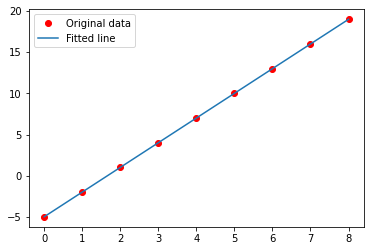

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight

Parameter containing:
tensor([[2.9970]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-4.9835], requires_grad=True)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape #tells you dimensions of data set 

(60000, 1, 28, 28)

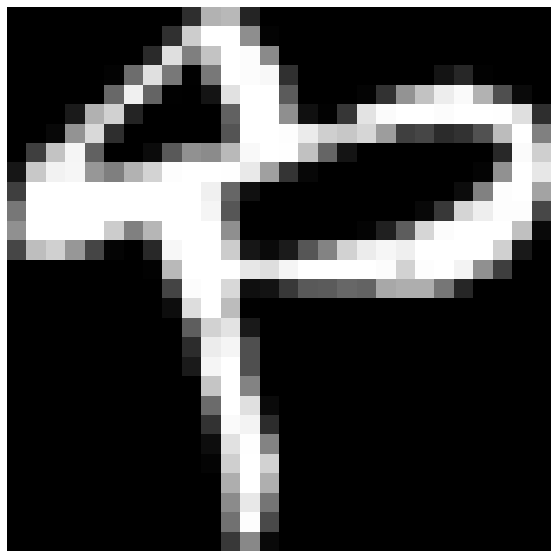

In [ ]:
plot(X[555,0,:,:]) #plot one of those by putting a number in replacement of the twp, the 0 stays 0 becuase we will always have a black and white image

In [ ]:
Y[123]

2

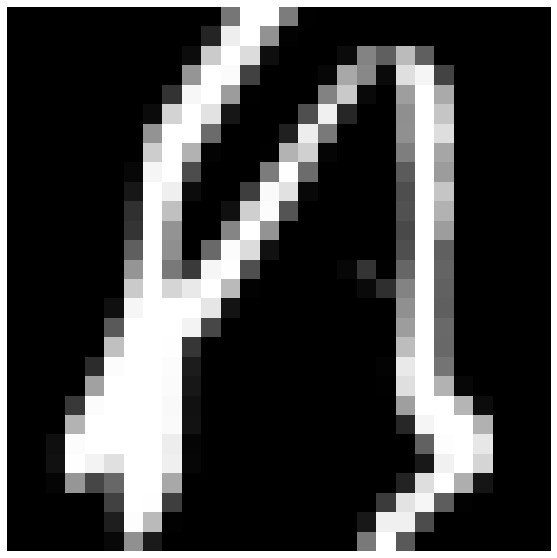

In [ ]:
for i in range(1): #the number in the paranthesis gives us how many images you want it to give.
    plot(X[i,0,:,:])

In [ ]:
Y

array([8, 7, 0, ..., 0, 4, 9])

In [ ]:
X[0:25,0,:,:].shape #gives the first 25 and the 0 color channel 

(25, 28, 28)

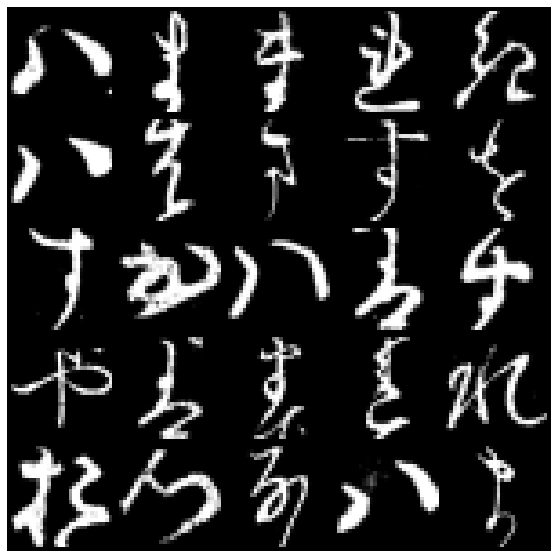

In [ ]:
montage_plot(X[125:150,0,:,:]) 

In [ ]:
X.shape[0] #we have 60000 images

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

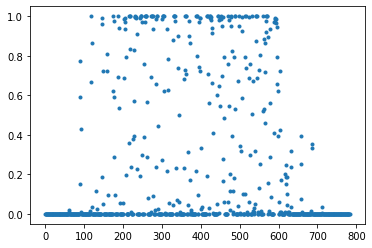

In [ ]:
plt.plot(X[100],'.') #y axis shows the brightness of the images most of them are zero because the image has no brightness

(array([548.,  11.,  17.,  18.,  15.,  17.,  16.,  14.,  16., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

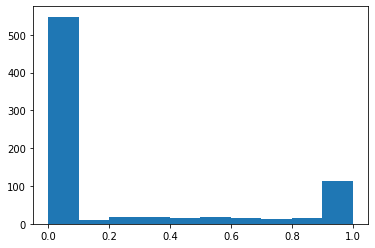

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W (3).data'

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape #object called W

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

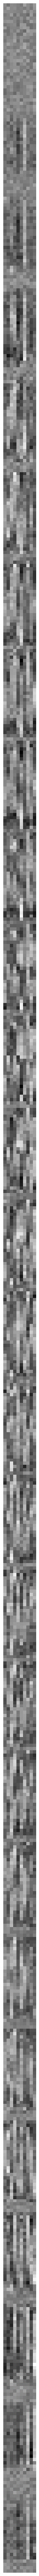

In [ ]:
plot(W[0:784,:10]) #784 rows and 10 columns

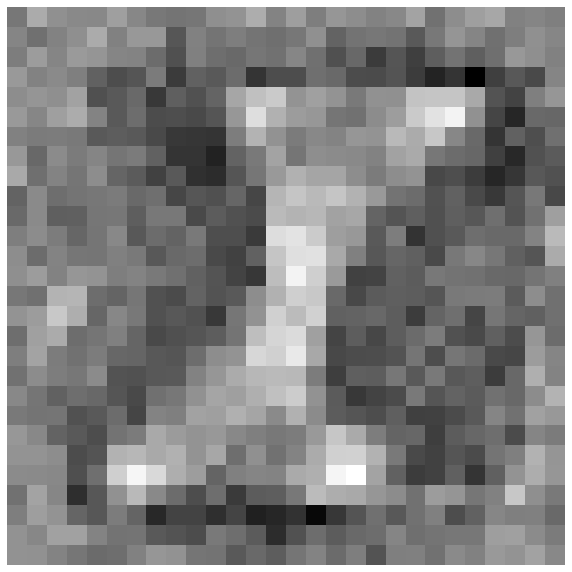

In [ ]:
plot(W[:,1].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

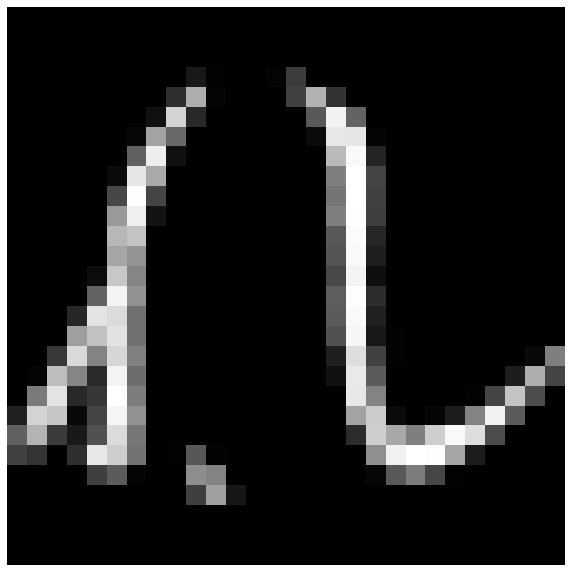

In [ ]:
plot(x[0].reshape(28,28))

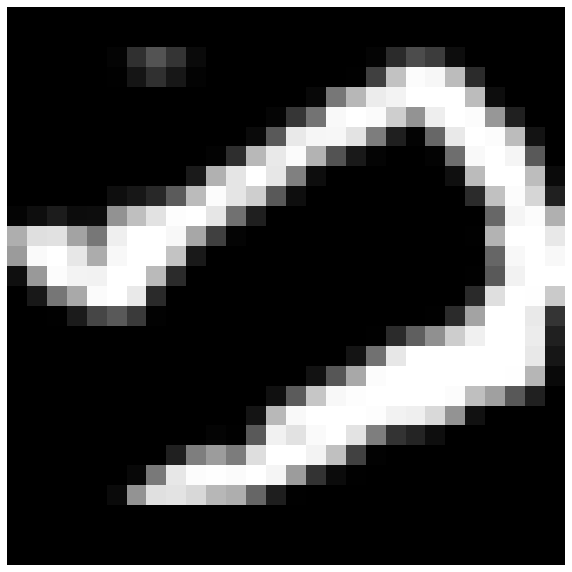

In [ ]:
plot(x[1].reshape(28,28))

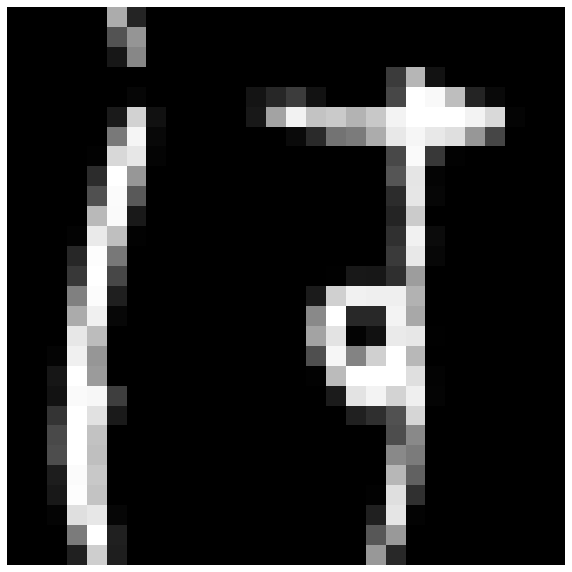

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y

tensor([8., 3., 5., 3., 5., 5., 1., 9., 7., 8., 9., 8., 5., 6., 4., 2., 7., 9.,
        4., 1., 9., 6., 0., 2., 5., 9., 1., 8., 5., 4., 4., 0., 4., 9., 4., 6.,
        4., 6., 2., 6., 5., 8., 9., 4., 4., 1., 4., 4., 4., 4., 8., 6., 4., 8.,
        9., 3., 0., 1., 5., 0., 7., 3., 5., 5., 4., 6., 8., 3., 6., 9., 1., 7.,
        3., 4., 4., 1., 6., 2., 8., 3., 7., 7., 8., 6., 0., 2., 2., 8., 6., 2.,
        7., 3., 8., 6., 8., 6., 3., 9., 0., 4., 3., 7., 9., 0., 6., 8., 8., 9.,
        3., 8., 7., 5., 9., 8., 4., 0., 4., 9., 6., 4., 6., 6., 1., 8., 2., 9.,
        2., 3., 7., 6., 8., 2., 6., 1., 7., 3., 4., 8., 8., 5., 3., 4., 4., 8.,
        8., 2., 6., 2., 6., 7., 8., 8., 9., 6., 7., 9., 6., 1., 6., 0., 5., 5.,
        6., 6., 2., 9., 4., 2., 1., 4., 3., 2., 3., 7., 4., 1., 4., 3., 0., 9.,
        5., 1., 5., 5., 8., 6., 1., 2., 6., 1., 7., 2., 2., 9., 4., 3., 0., 7.,
        1., 1., 7., 2., 2., 8., 0., 5., 6., 8., 5., 9., 3., 6., 6., 8., 2., 2.,
        1., 8., 7., 4., 6., 8., 7., 3., 

In [ ]:
x.shape, W.shape #1000 images with 84 pixels for x shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape #for each image we put in we get 1000 by 10

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

39 µs ± 6.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[ -5.1584, -13.3103,   5.9210,  ...,  -3.6748, -10.2418,  -8.1401],
        [ -7.2023, -24.0788, -13.2818,  ..., -12.2487, -12.2462, -30.6426],
        [ -9.7884, -14.0549,  -3.6667,  ...,  -4.1662, -14.1508, -14.5316],
        ...,
        [-16.2167, -20.2481, -12.0862,  ..., -11.2742,  -1.1230, -19.9711],
        [-15.7302, -19.6893, -12.3596,  ...,   5.5284,  -4.6372,   5.0335],
        [ -3.4294, -24.4035,   4.6347,  ...,  -9.6869,  -6.5033, -18.9994]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W #same formula y=mx

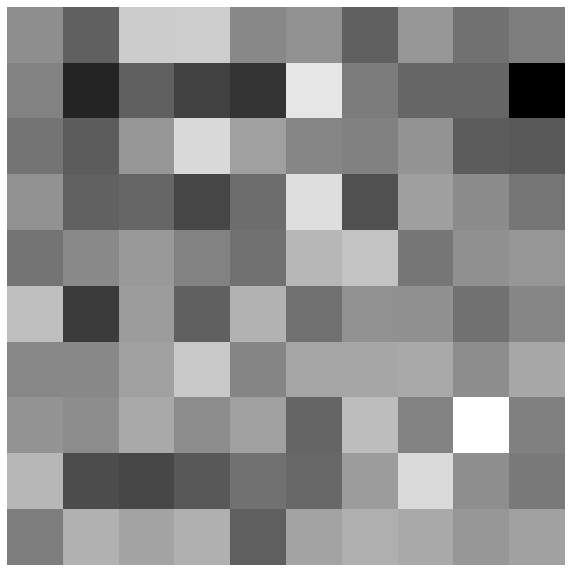

In [ ]:
plot(y2[0:10,:])

In [ ]:
y

tensor([8., 3., 5., 3., 5., 5., 1., 9., 7., 8., 9., 8., 5., 6., 4., 2., 7., 9.,
        4., 1., 9., 6., 0., 2., 5., 9., 1., 8., 5., 4., 4., 0., 4., 9., 4., 6.,
        4., 6., 2., 6., 5., 8., 9., 4., 4., 1., 4., 4., 4., 4., 8., 6., 4., 8.,
        9., 3., 0., 1., 5., 0., 7., 3., 5., 5., 4., 6., 8., 3., 6., 9., 1., 7.,
        3., 4., 4., 1., 6., 2., 8., 3., 7., 7., 8., 6., 0., 2., 2., 8., 6., 2.,
        7., 3., 8., 6., 8., 6., 3., 9., 0., 4., 3., 7., 9., 0., 6., 8., 8., 9.,
        3., 8., 7., 5., 9., 8., 4., 0., 4., 9., 6., 4., 6., 6., 1., 8., 2., 9.,
        2., 3., 7., 6., 8., 2., 6., 1., 7., 3., 4., 8., 8., 5., 3., 4., 4., 8.,
        8., 2., 6., 2., 6., 7., 8., 8., 9., 6., 7., 9., 6., 1., 6., 0., 5., 5.,
        6., 6., 2., 9., 4., 2., 1., 4., 3., 2., 3., 7., 4., 1., 4., 3., 0., 9.,
        5., 1., 5., 5., 8., 6., 1., 2., 6., 1., 7., 2., 2., 9., 4., 3., 0., 7.,
        1., 1., 7., 2., 2., 8., 0., 5., 6., 8., 5., 9., 3., 6., 6., 8., 2., 2.,
        1., 8., 7., 4., 6., 8., 7., 3., 

In [ ]:
one_hot(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


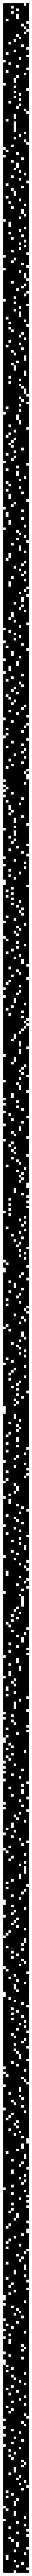

In [ ]:
plot(one_hot(y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


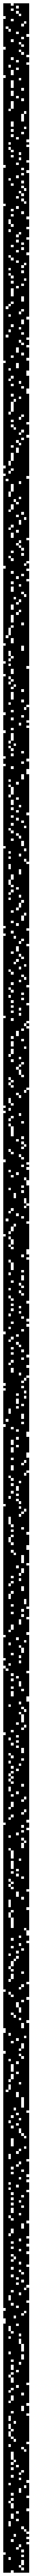

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

tensor([8., 3., 5., 3., 5., 5., 1., 9., 7., 8., 9., 8., 5., 6., 4., 2., 7., 9.,
        4., 1., 9., 6., 0., 2., 5., 9., 1., 8., 5., 4., 4., 0., 4., 9., 4., 6.,
        4., 6., 2., 6., 5., 8., 9., 4., 4., 1., 4., 4., 4., 4., 8., 6., 4., 8.,
        9., 3., 0., 1., 5., 0., 7., 3., 5., 5., 4., 6., 8., 3., 6., 9., 1., 7.,
        3., 4., 4., 1., 6., 2., 8., 3., 7., 7., 8., 6., 0., 2., 2., 8., 6., 2.,
        7., 3., 8., 6., 8., 6., 3., 9., 0., 4., 3., 7., 9., 0., 6., 8., 8., 9.,
        3., 8., 7., 5., 9., 8., 4., 0., 4., 9., 6., 4., 6., 6., 1., 8., 2., 9.,
        2., 3., 7., 6., 8., 2., 6., 1., 7., 3., 4., 8., 8., 5., 3., 4., 4., 8.,
        8., 2., 6., 2., 6., 7., 8., 8., 9., 6., 7., 9., 6., 1., 6., 0., 5., 5.,
        6., 6., 2., 9., 4., 2., 1., 4., 3., 2., 3., 7., 4., 1., 4., 3., 0., 9.,
        5., 1., 5., 5., 8., 6., 1., 2., 6., 1., 7., 2., 2., 9., 4., 3., 0., 7.,
        1., 1., 7., 2., 2., 8., 0., 5., 6., 8., 5., 9., 3., 6., 6., 8., 2., 2.,
        1., 8., 7., 4., 6., 8., 7., 3., 

In [ ]:
torch.argmax(y2,1)

tensor([3, 5, 3, 5, 6, 0, 3, 8, 7, 1, 2, 5, 9, 7, 3, 6, 7, 0, 6, 7, 9, 3, 5, 9,
        2, 5, 3, 3, 0, 6, 3, 3, 3, 7, 3, 3, 5, 7, 3, 3, 3, 2, 8, 7, 7, 7, 3, 3,
        8, 3, 7, 3, 5, 9, 2, 9, 2, 3, 6, 3, 6, 9, 5, 0, 7, 9, 7, 5, 2, 7, 3, 7,
        8, 6, 7, 5, 7, 8, 0, 5, 3, 7, 3, 9, 2, 2, 3, 9, 2, 6, 5, 9, 5, 7, 3, 7,
        5, 9, 2, 3, 5, 8, 7, 2, 7, 2, 3, 8, 3, 7, 5, 3, 3, 3, 7, 7, 3, 2, 1, 7,
        6, 2, 9, 7, 7, 3, 6, 2, 7, 1, 9, 6, 7, 9, 5, 5, 7, 3, 9, 0, 5, 5, 2, 9,
        9, 3, 2, 6, 3, 7, 9, 9, 3, 6, 4, 3, 3, 3, 3, 2, 7, 6, 3, 9, 3, 4, 7, 6,
        9, 7, 5, 6, 3, 5, 5, 3, 3, 3, 2, 2, 0, 3, 2, 0, 9, 1, 6, 3, 3, 3, 2, 2,
        6, 4, 5, 3, 3, 2, 7, 5, 8, 6, 6, 3, 2, 5, 3, 3, 9, 6, 5, 6, 7, 3, 7, 2,
        3, 9, 8, 0, 9, 3, 7, 5, 9, 3, 6, 3, 3, 7, 8, 4, 6, 5, 3, 3, 6, 5, 3, 3,
        3, 7, 3, 2, 2, 2, 1, 3, 3, 0, 7, 7, 2, 2, 3, 2, 0, 2, 9, 3, 3, 0, 2, 3,
        2, 4, 3, 7, 3, 3, 3, 7, 2, 9, 8, 3, 0, 7, 3, 9, 6, 9, 3, 0, 3, 3, 3, 2,
        4, 2, 3, 7, 3, 0, 9, 7, 0, 3, 9,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0810, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0789, device='cuda:0')

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

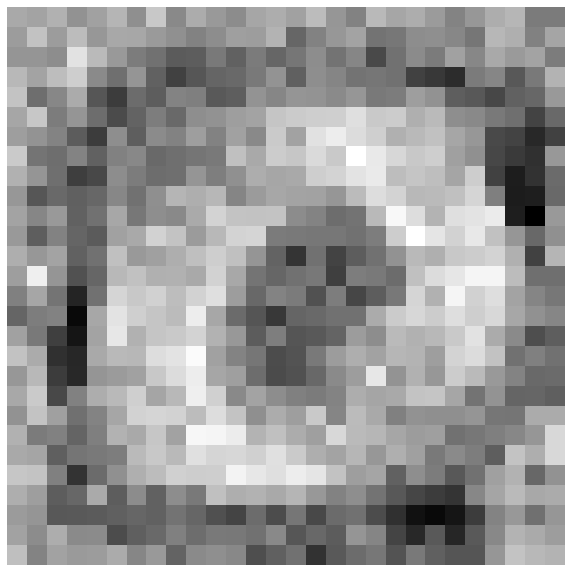

In [ ]:
plot(W[:,0].reshape(28,28))

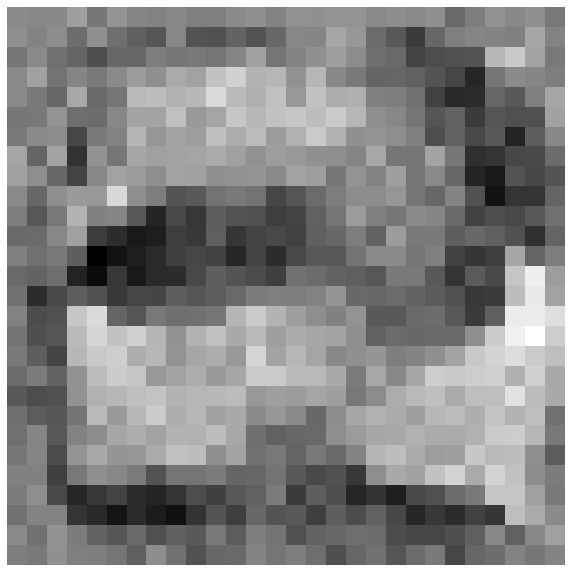

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

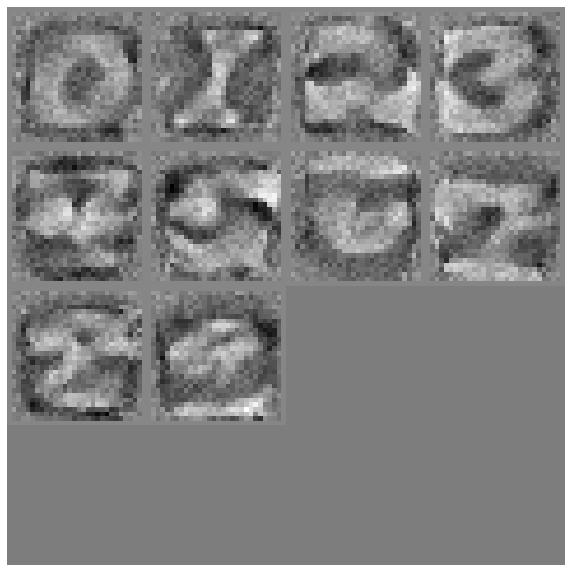

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x): #make sure everything is scale from 1
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):     #measure when the label is different from what its meant to be       
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


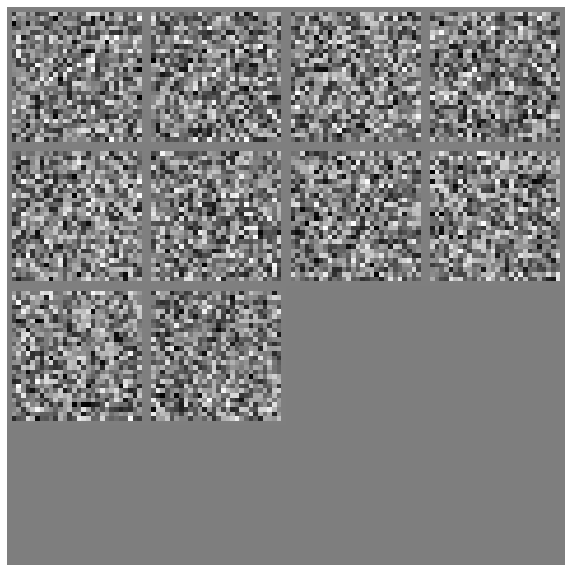

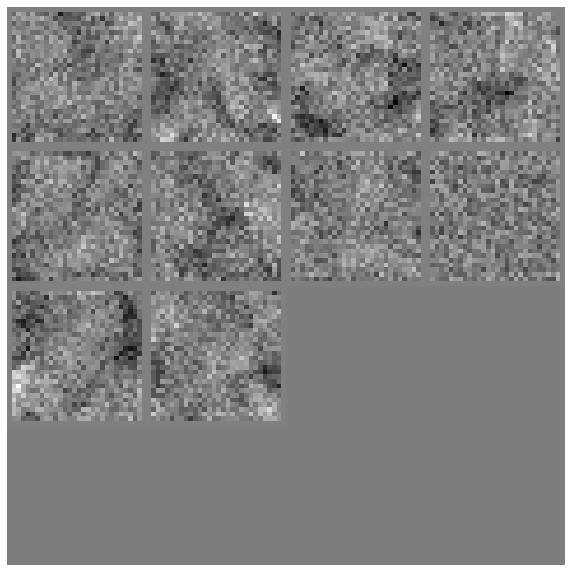

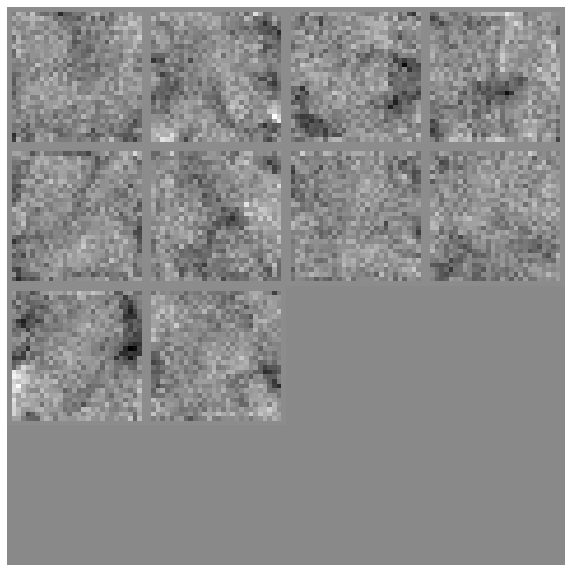

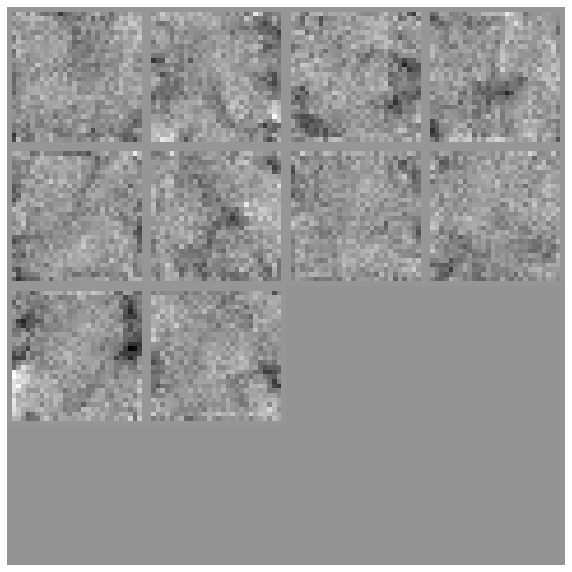

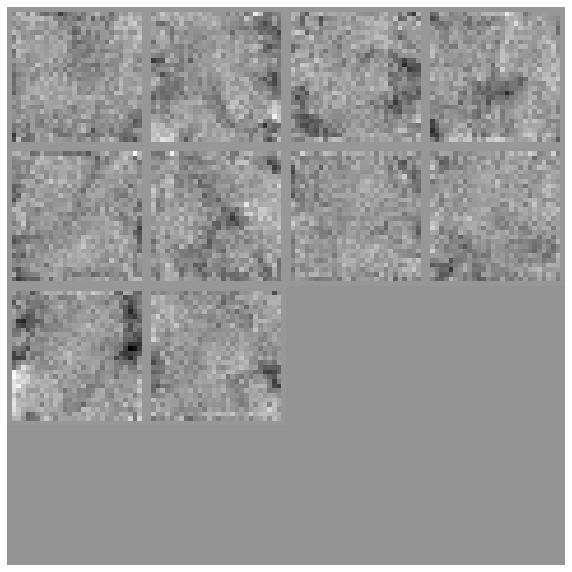

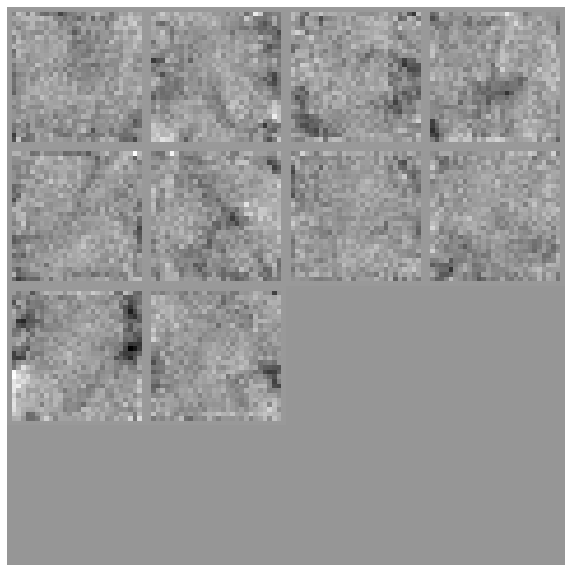

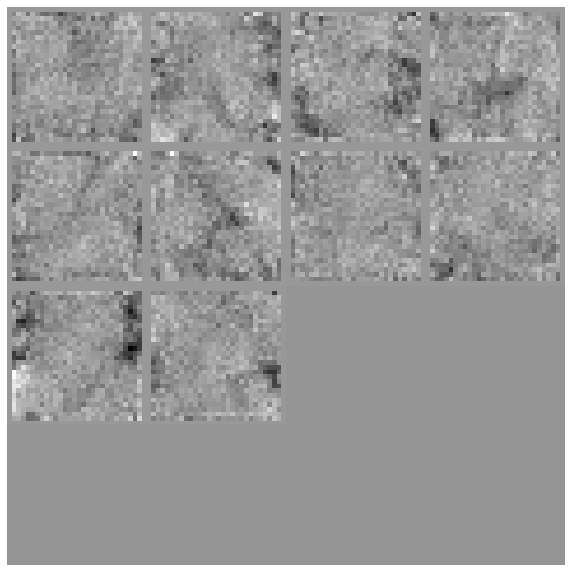

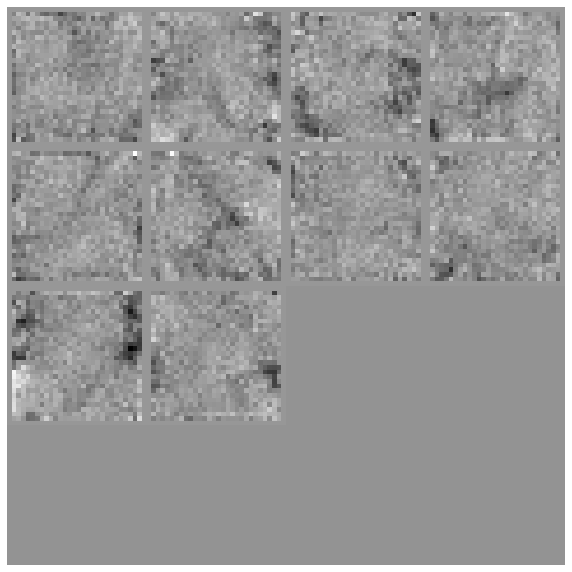

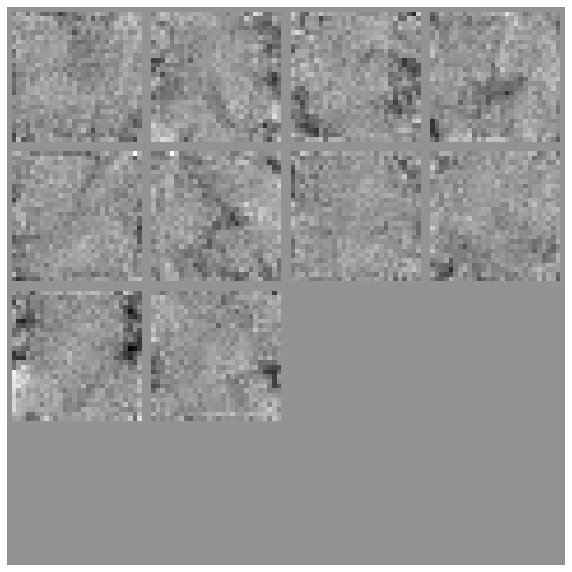

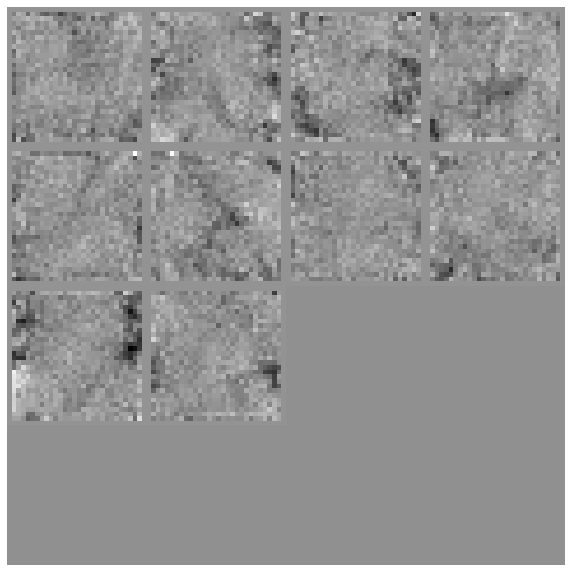

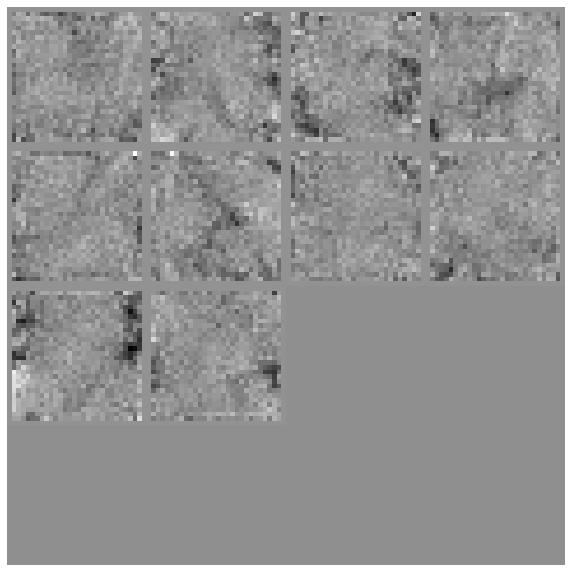

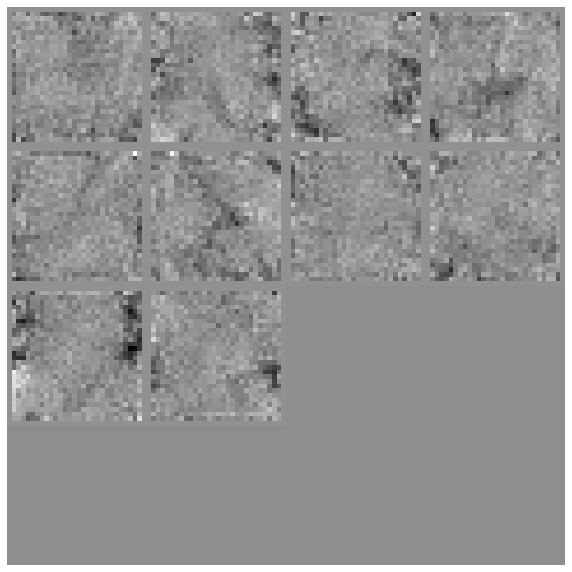

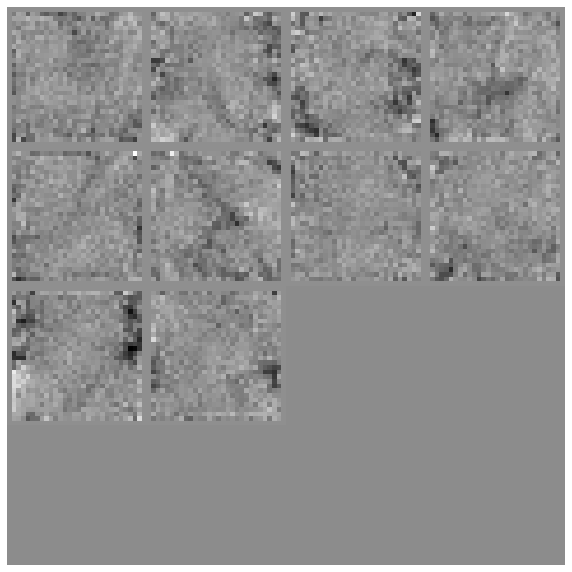

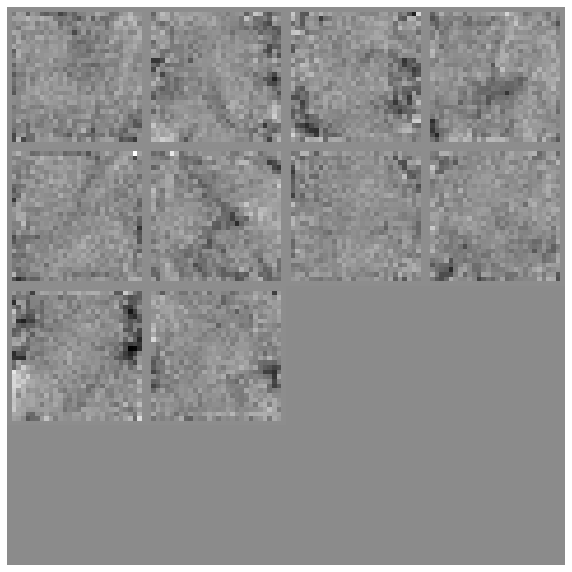

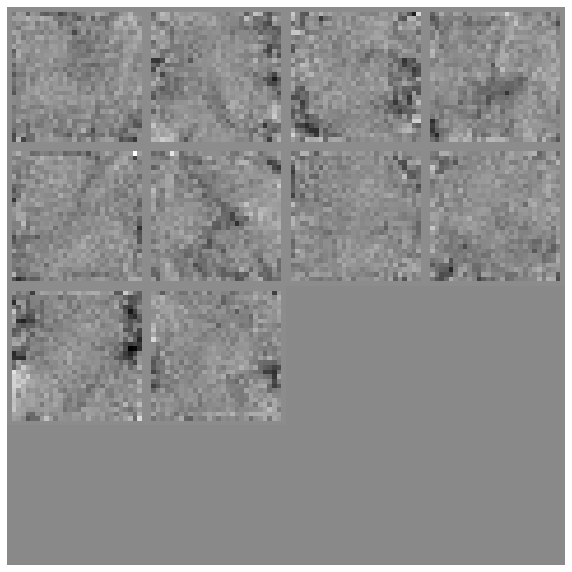

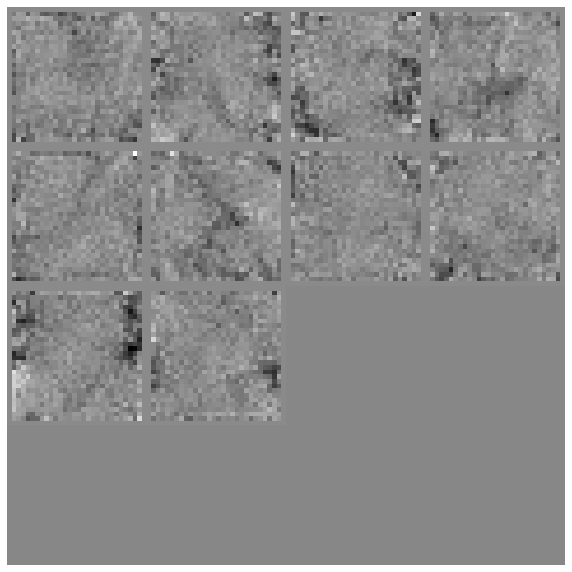

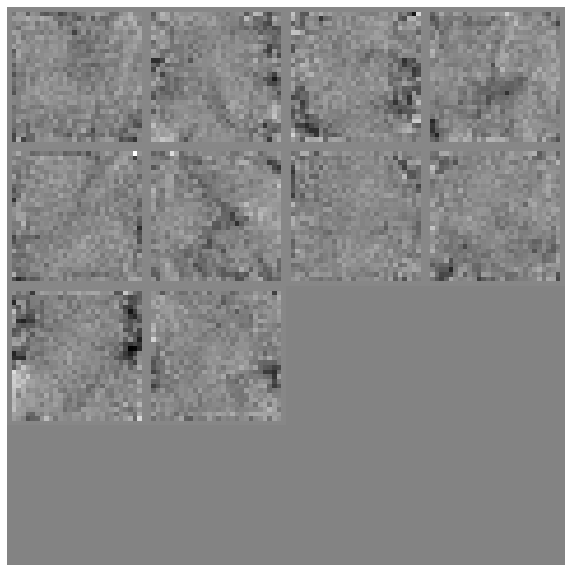

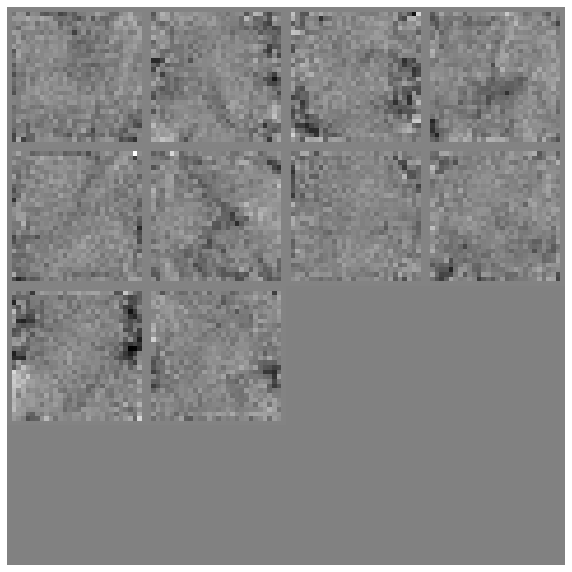

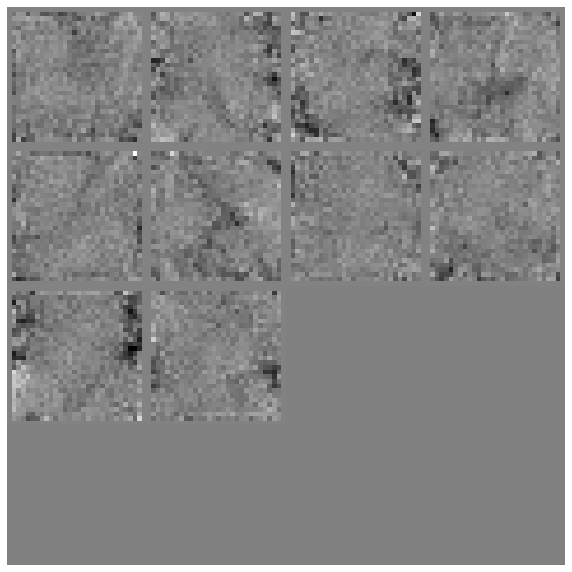

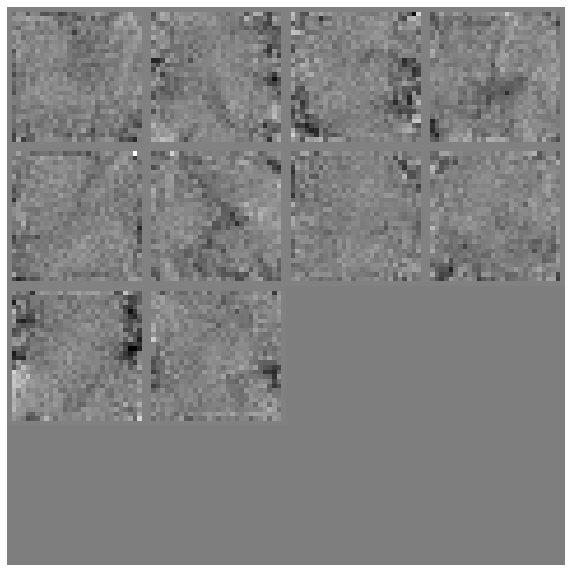

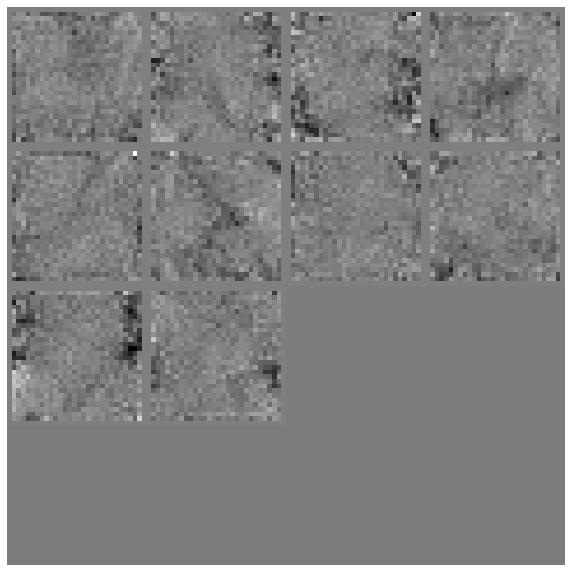

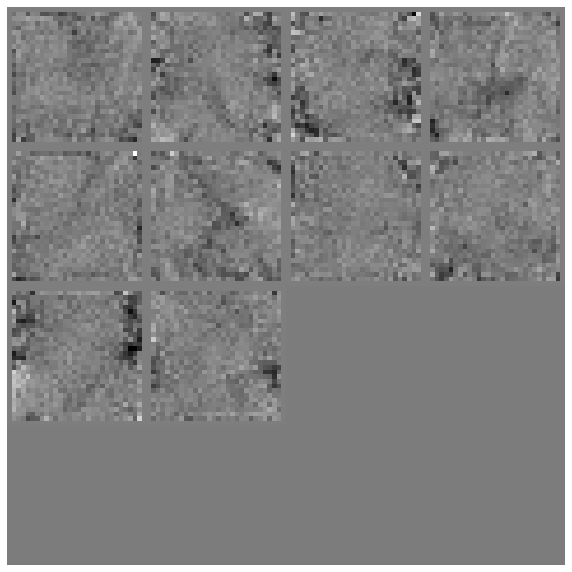

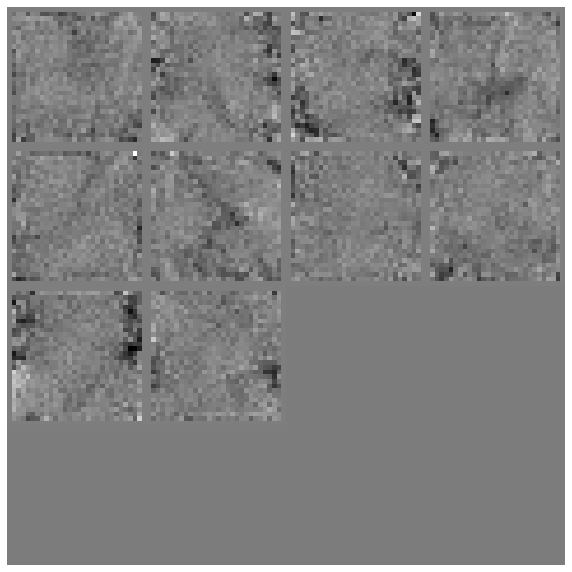

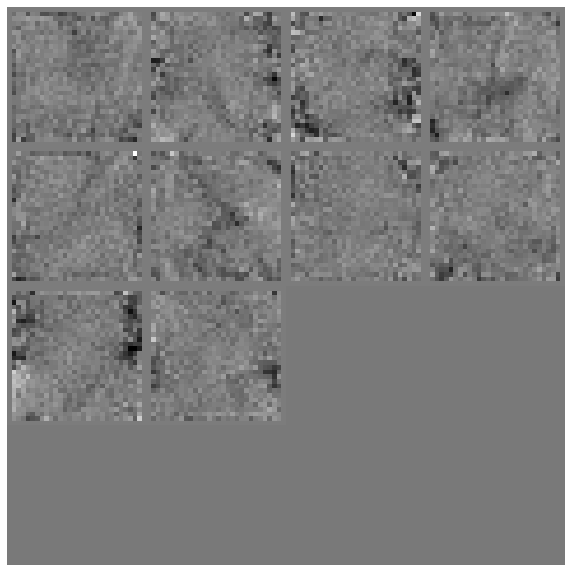

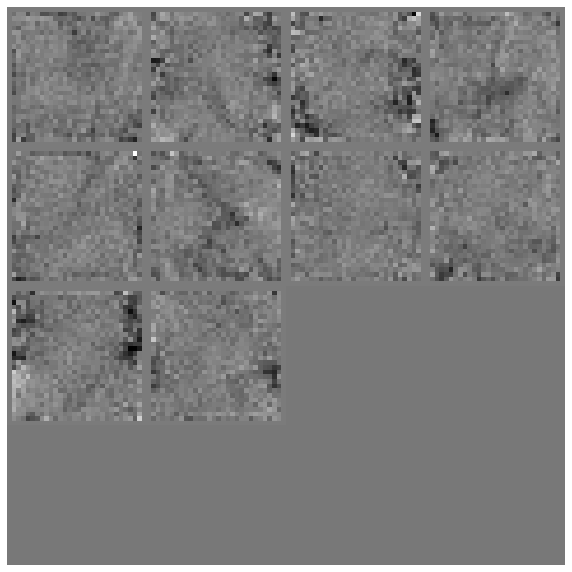

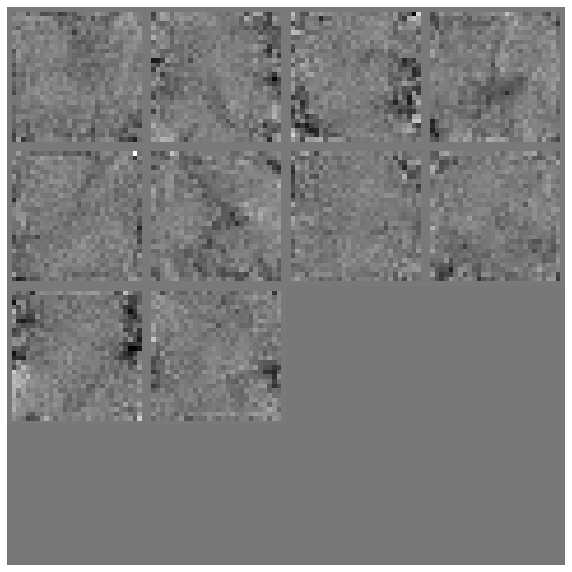

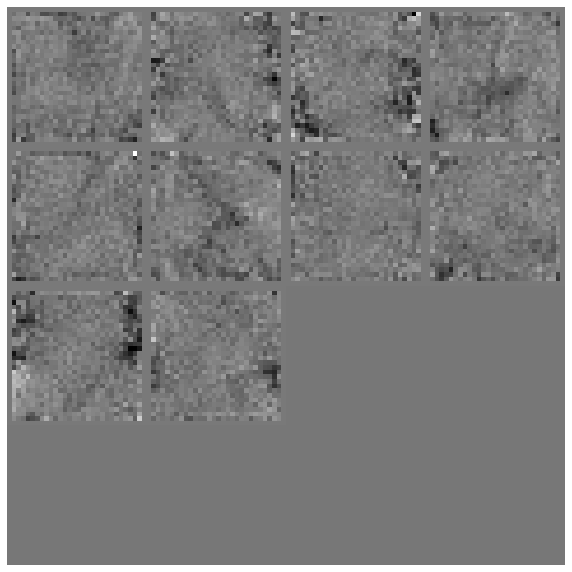

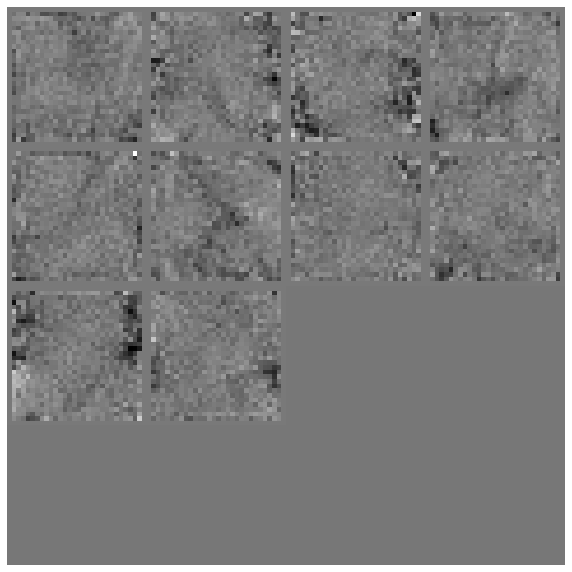

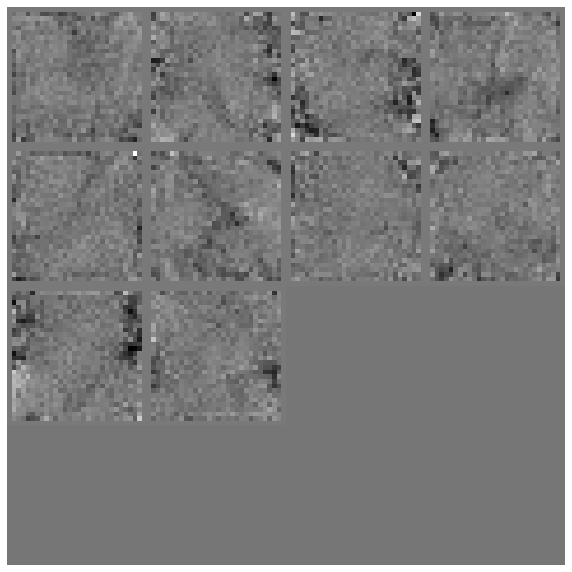

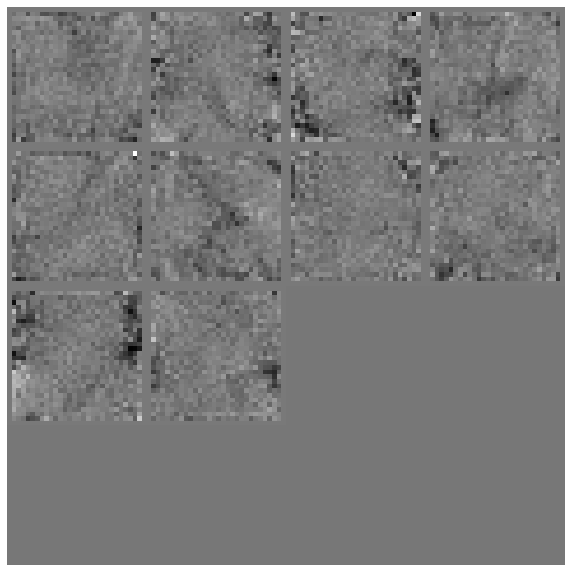

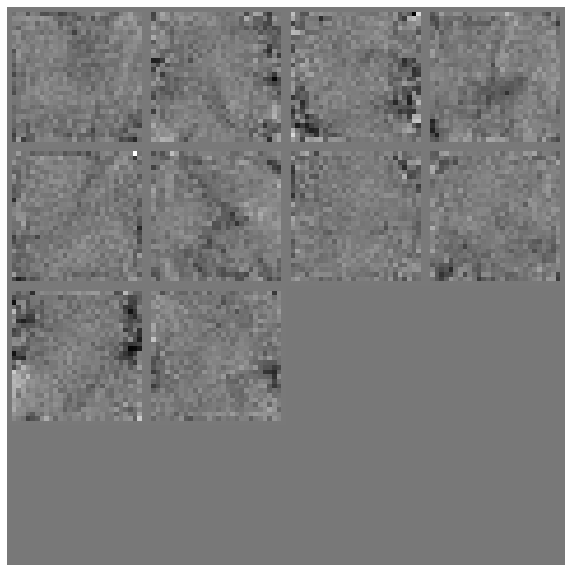

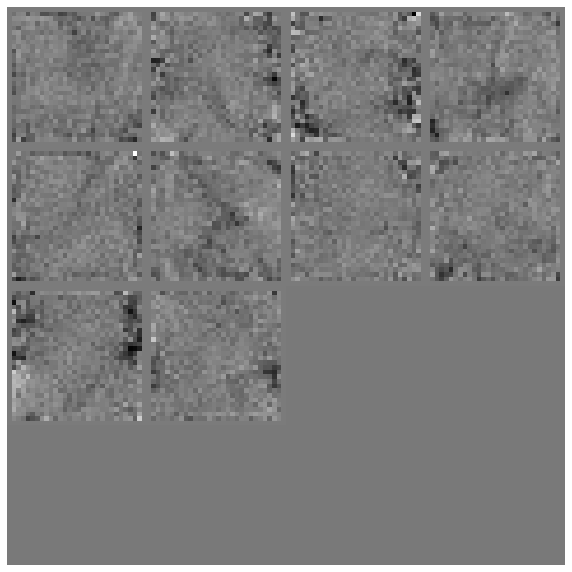

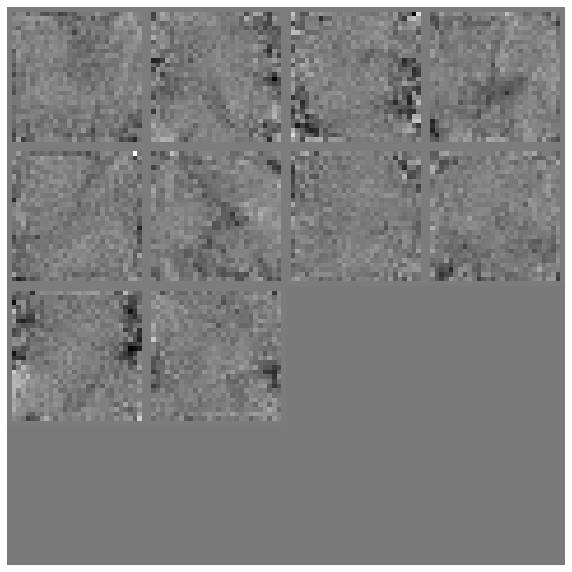

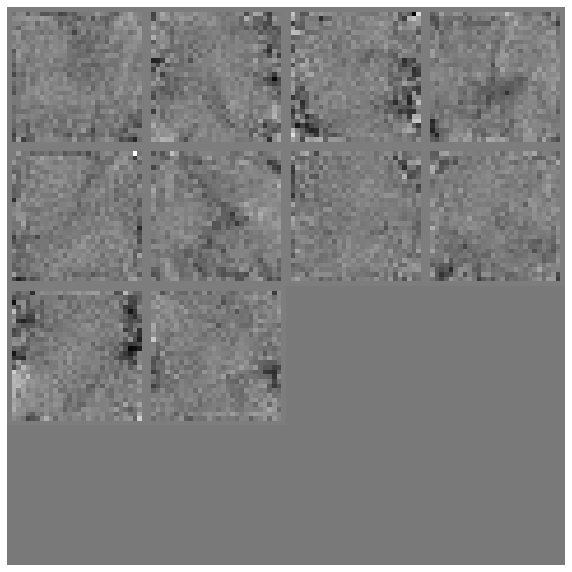

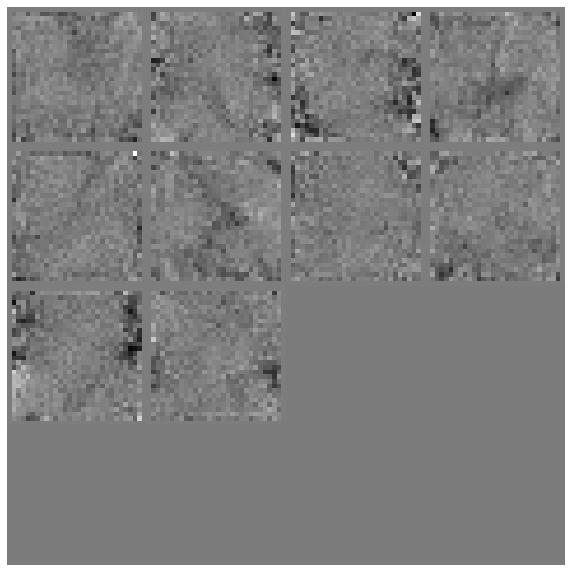

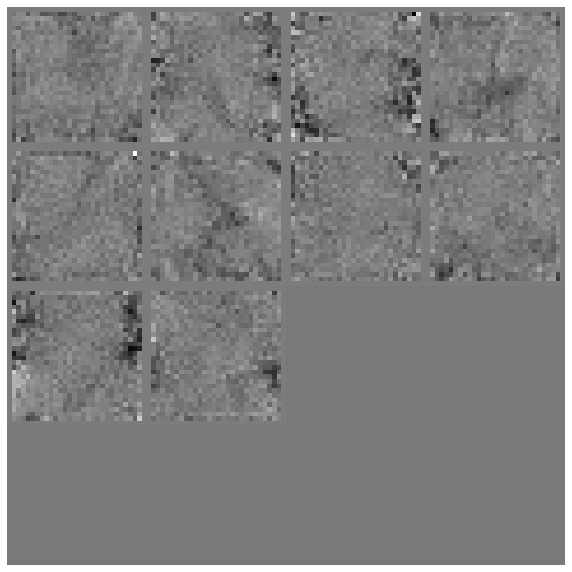

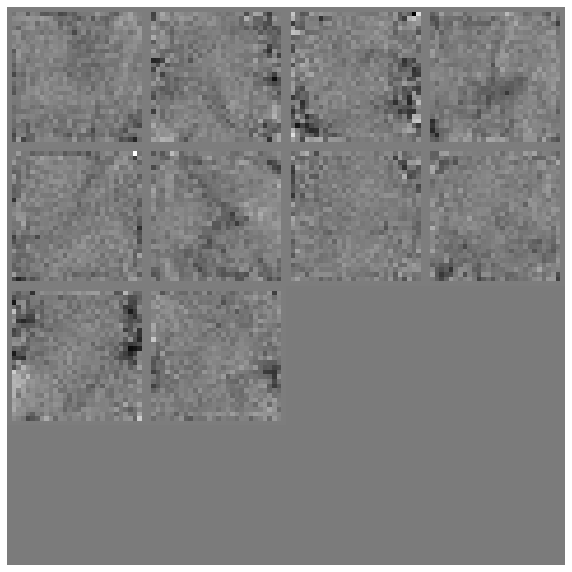

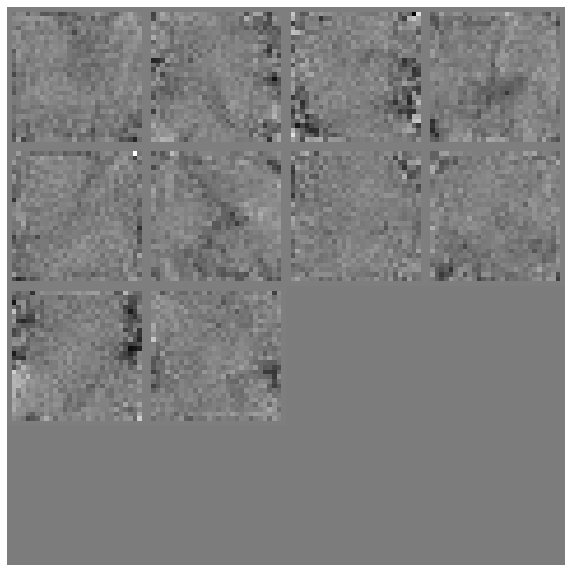

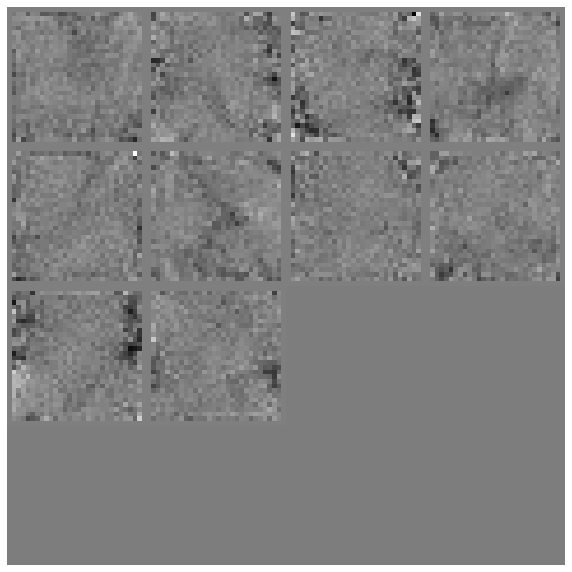

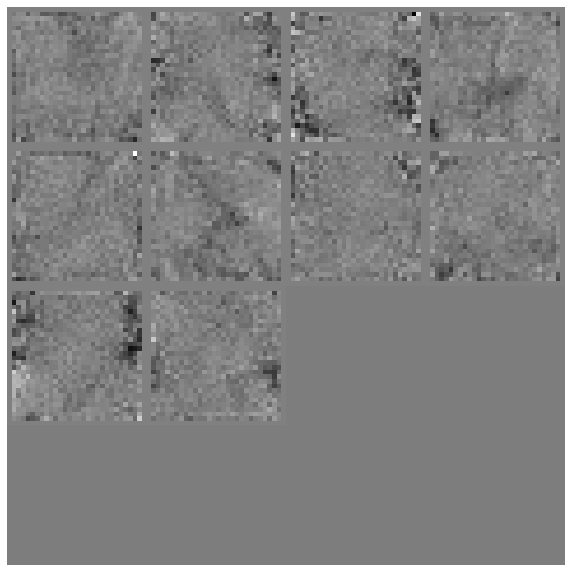

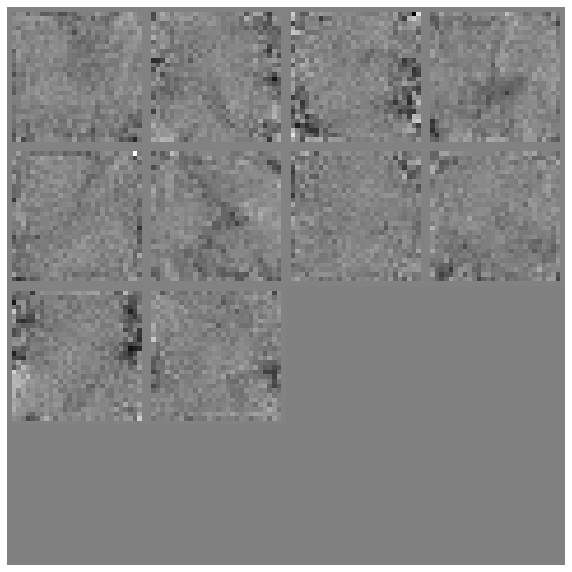

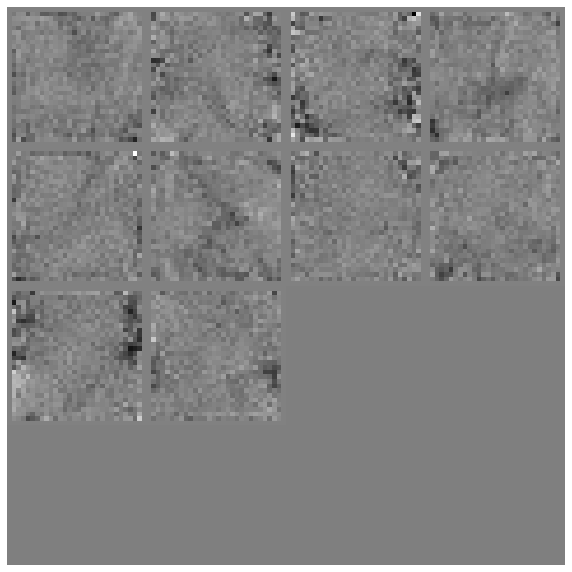

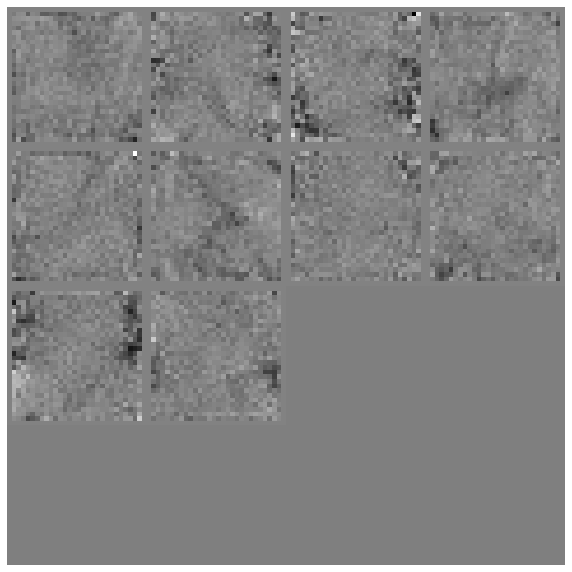

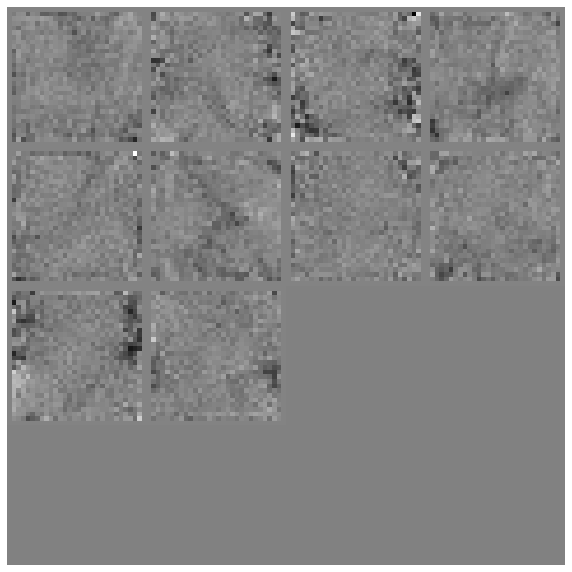

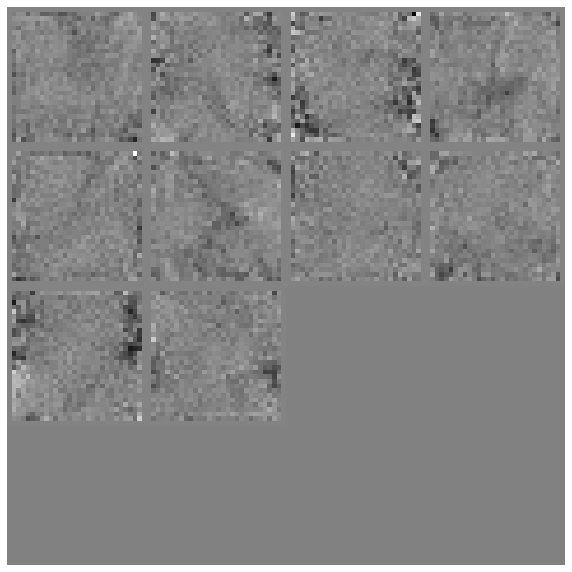

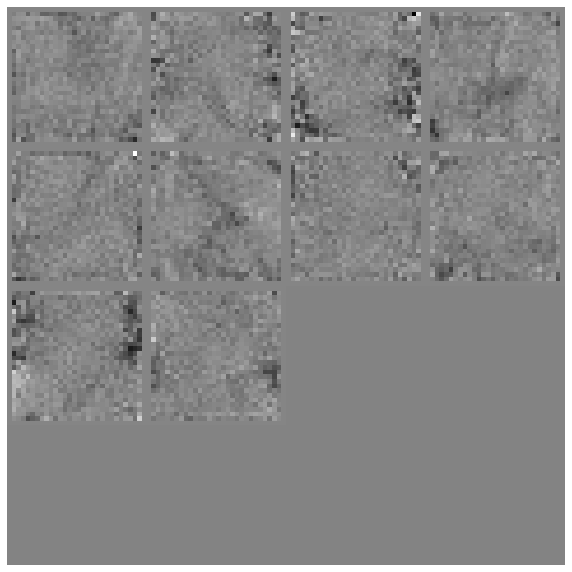

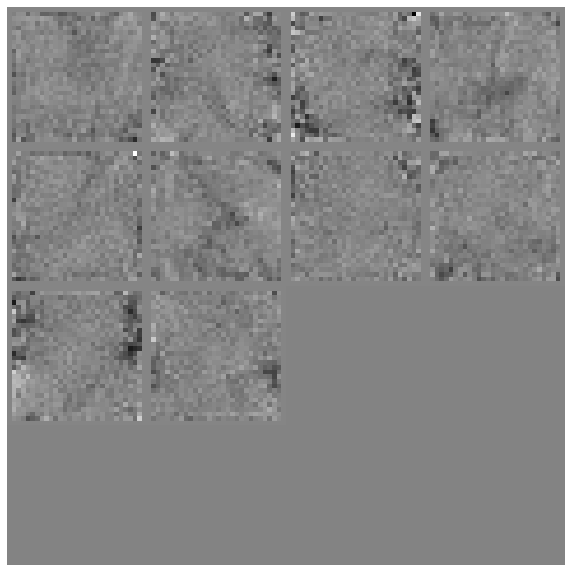

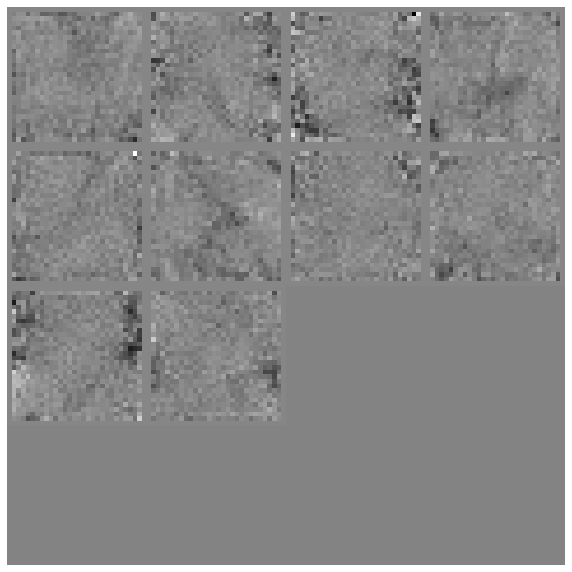

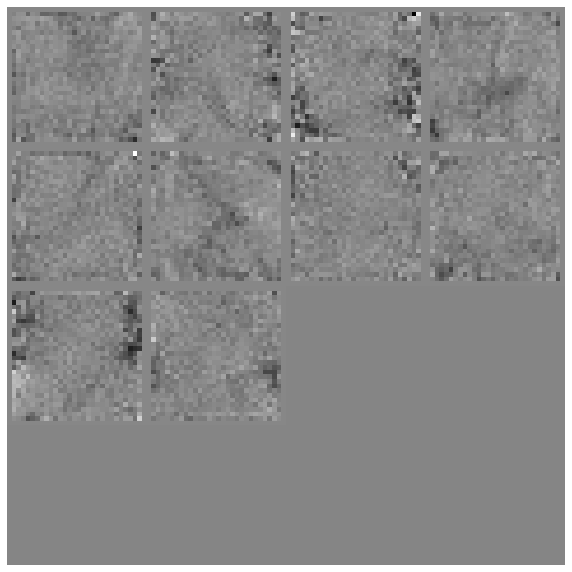

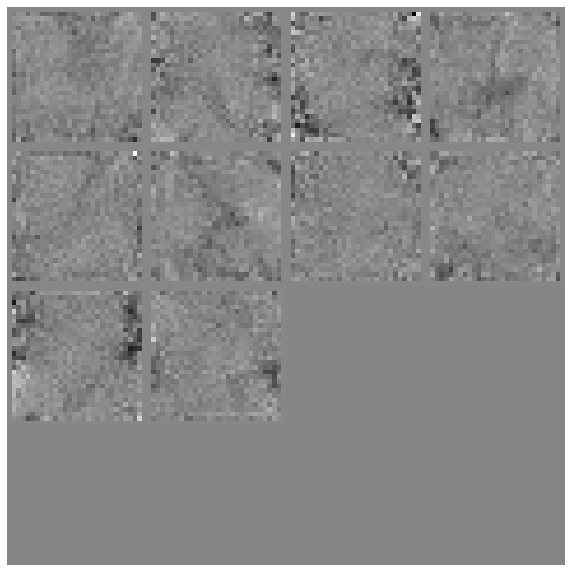

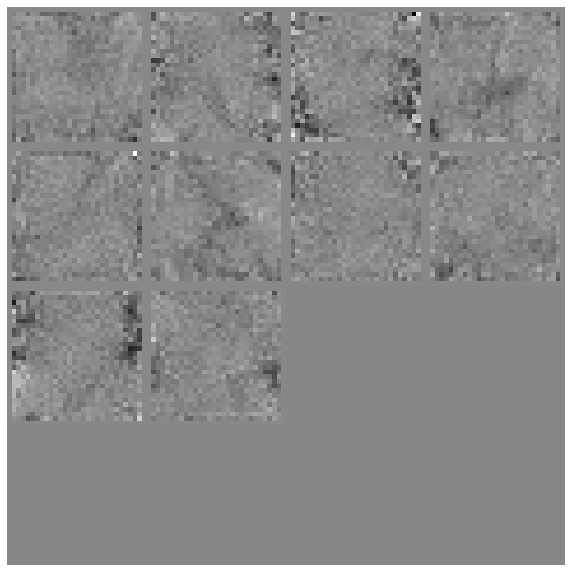

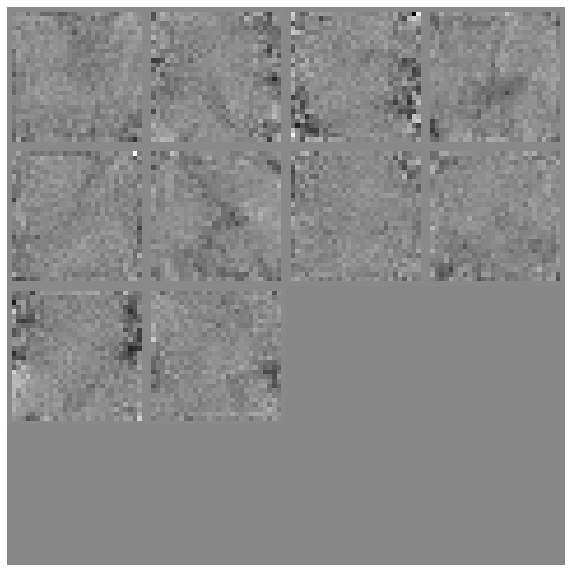

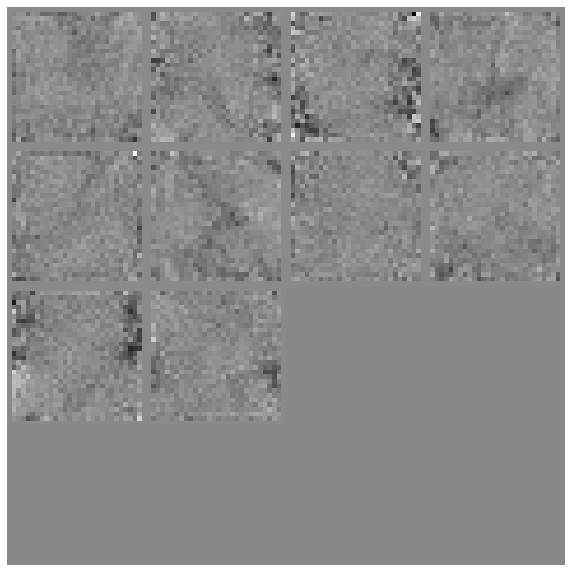

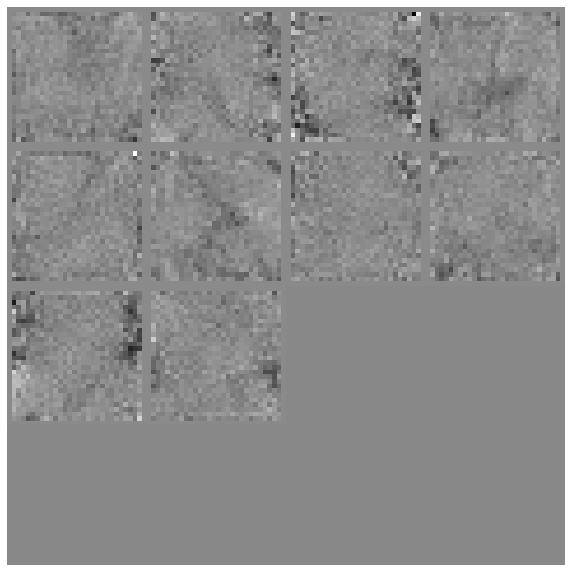

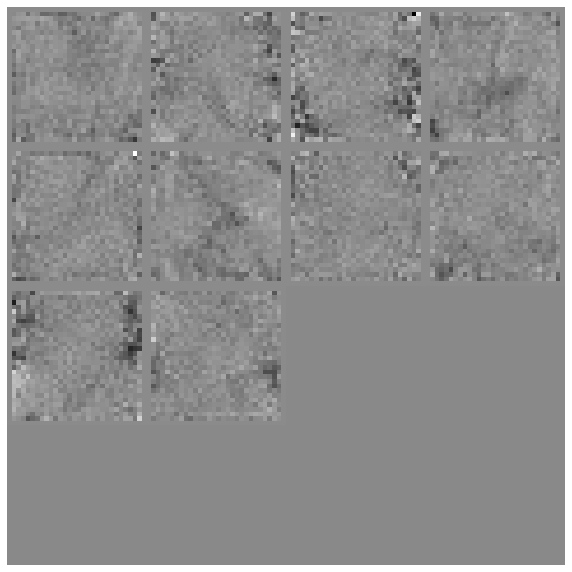

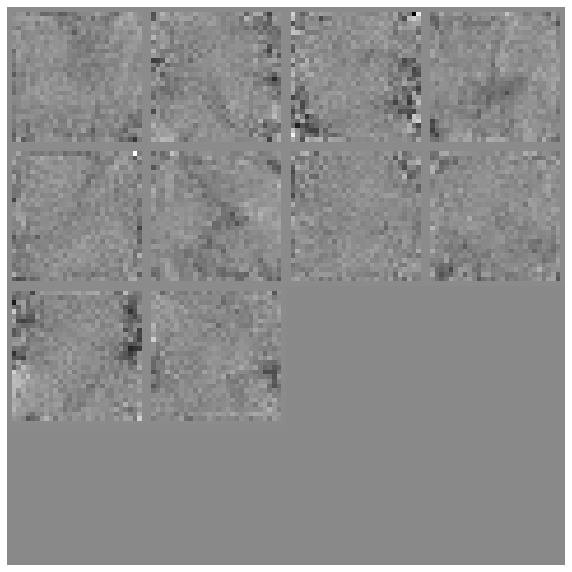

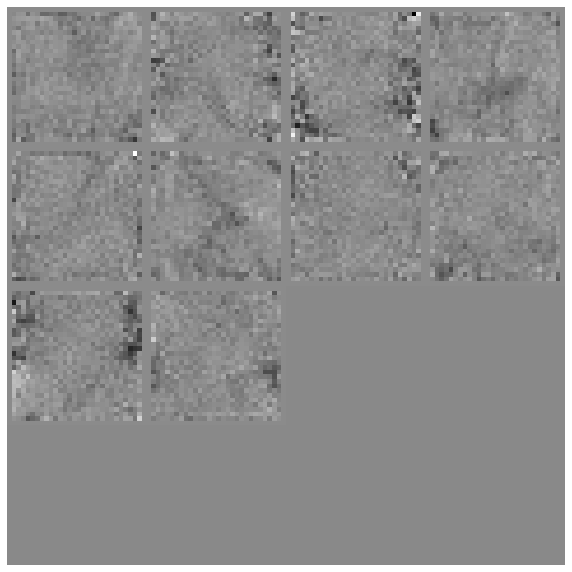

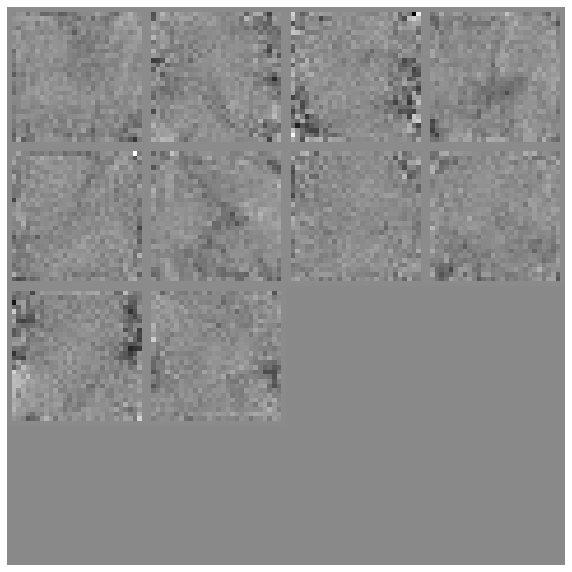

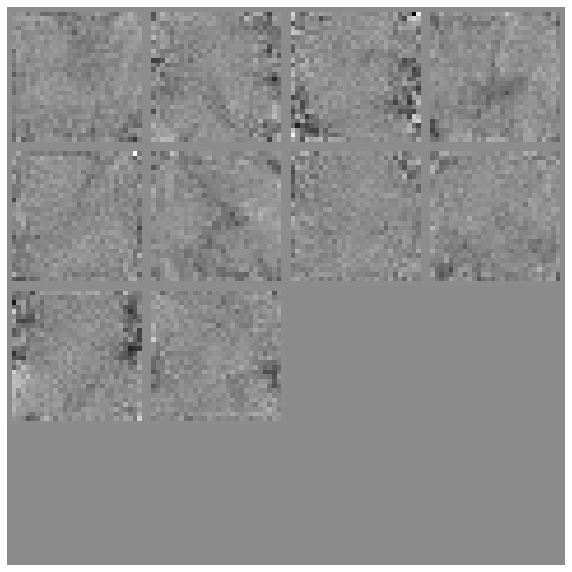

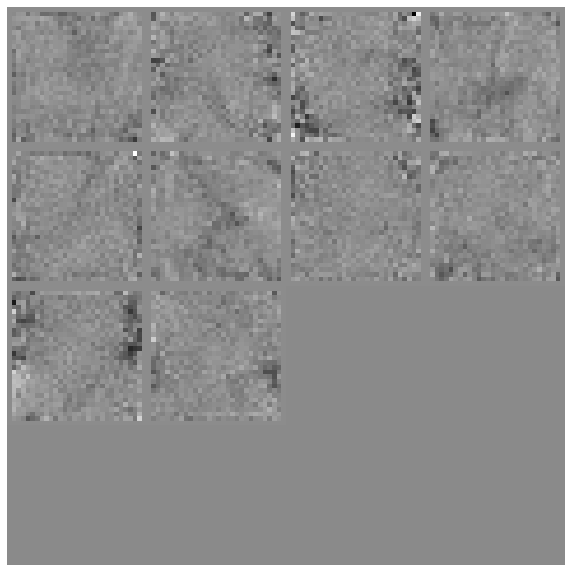

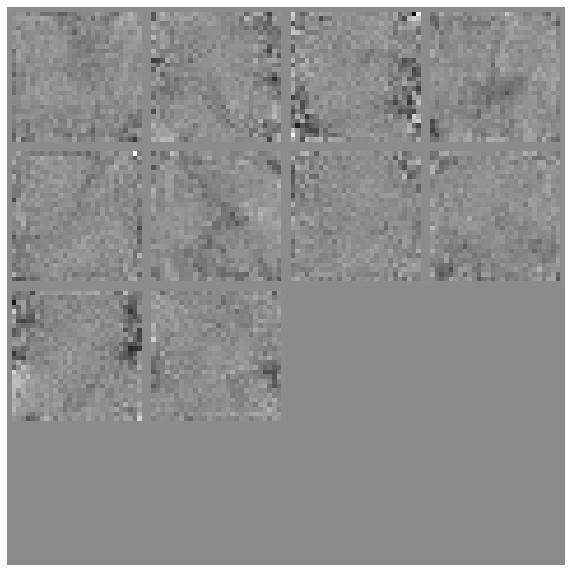

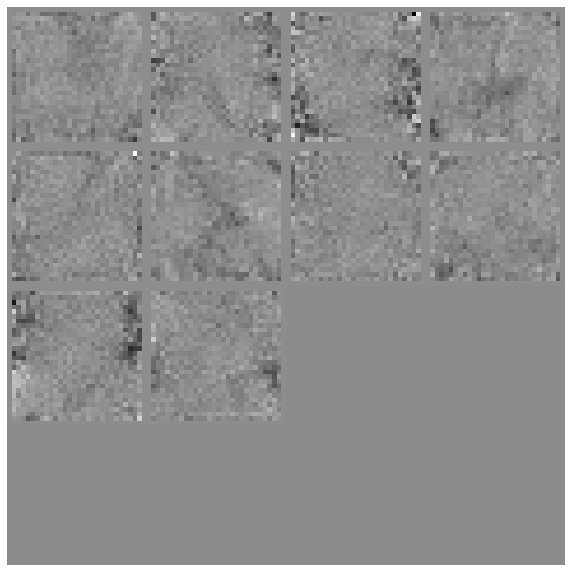

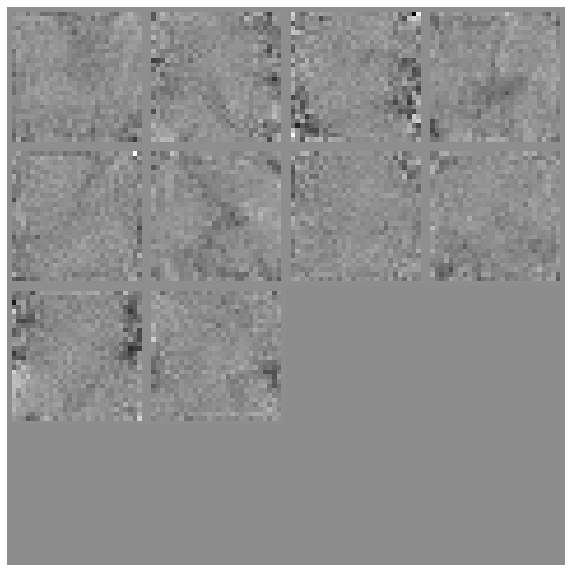

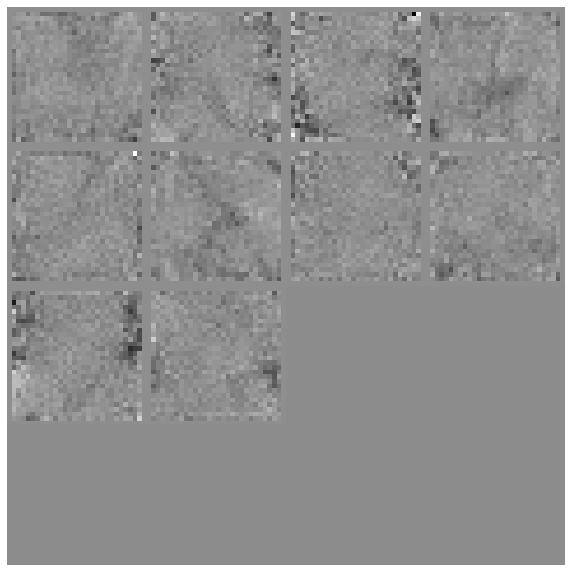

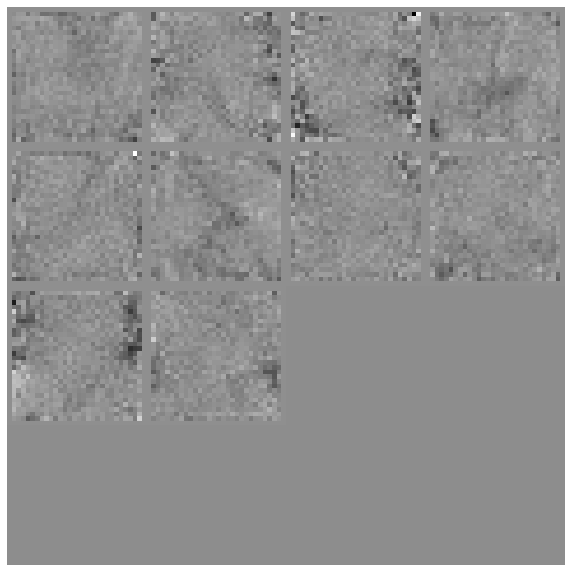

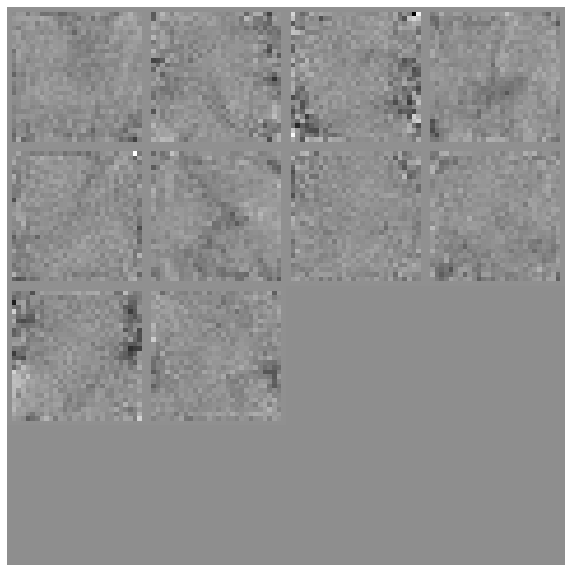

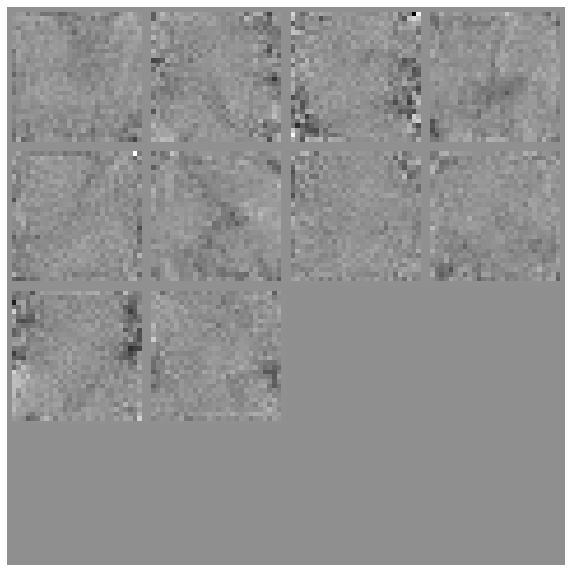

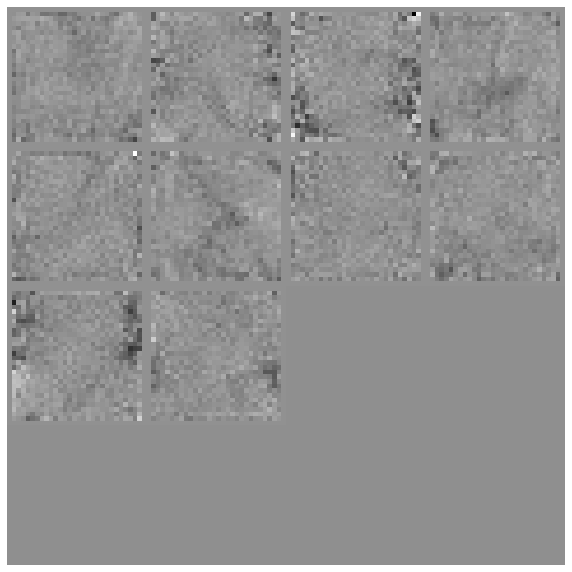

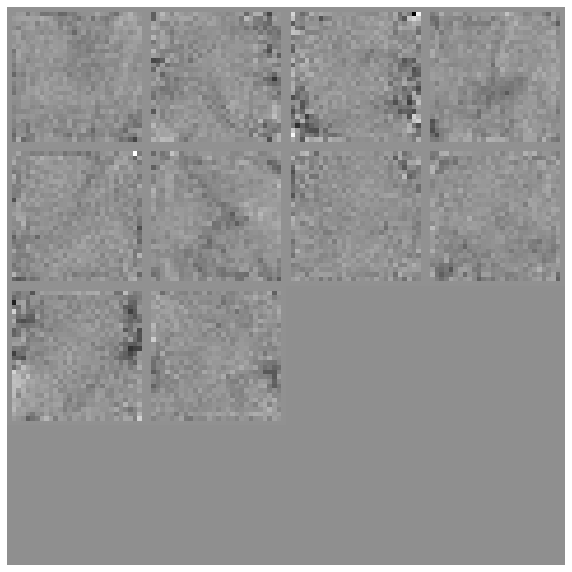

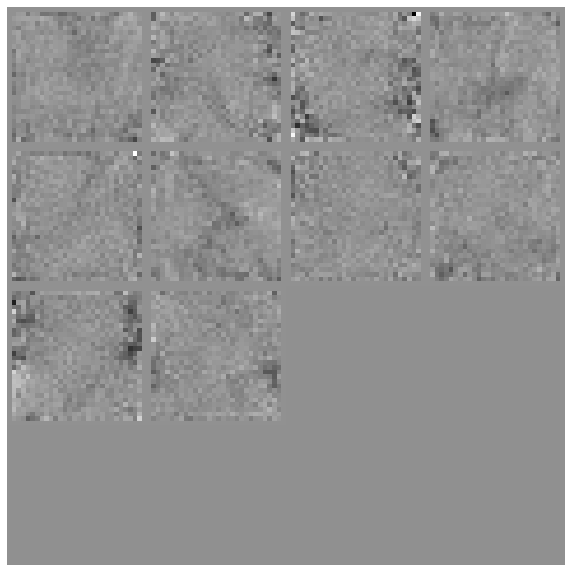

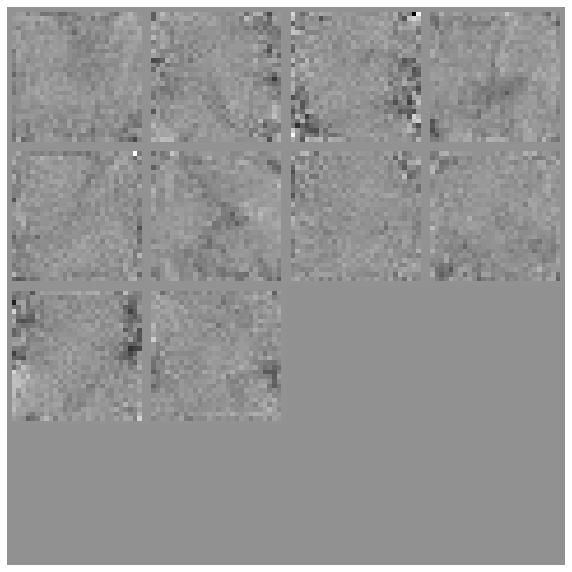

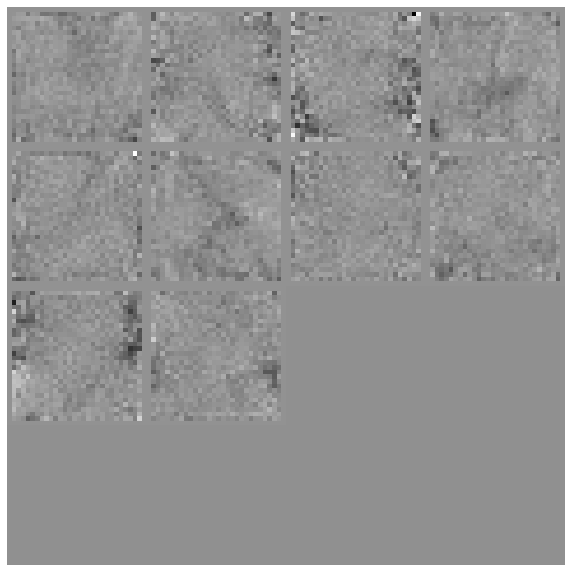

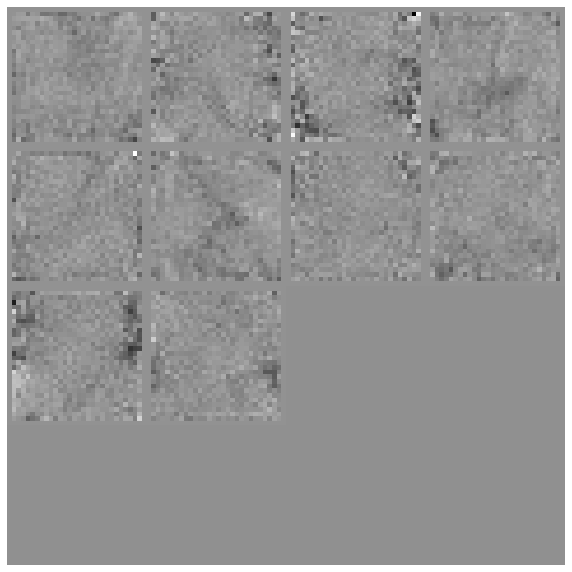

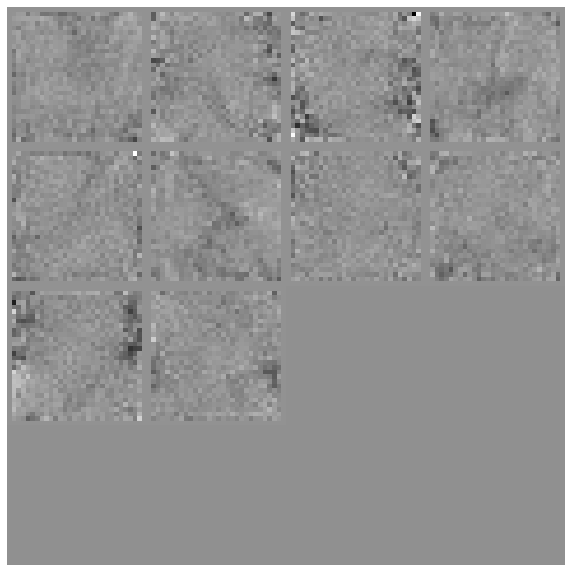

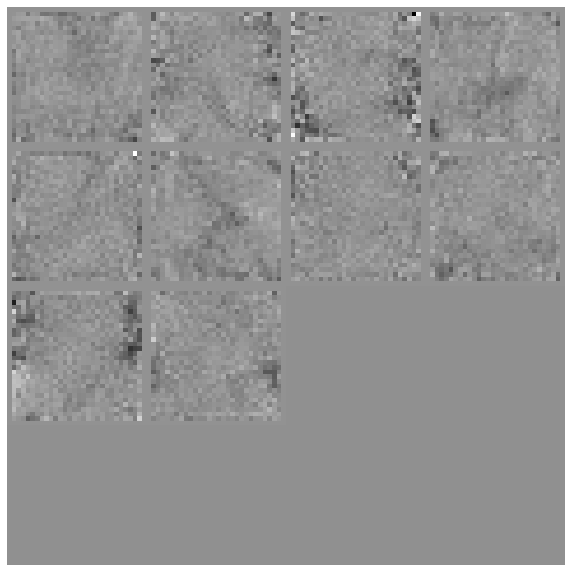

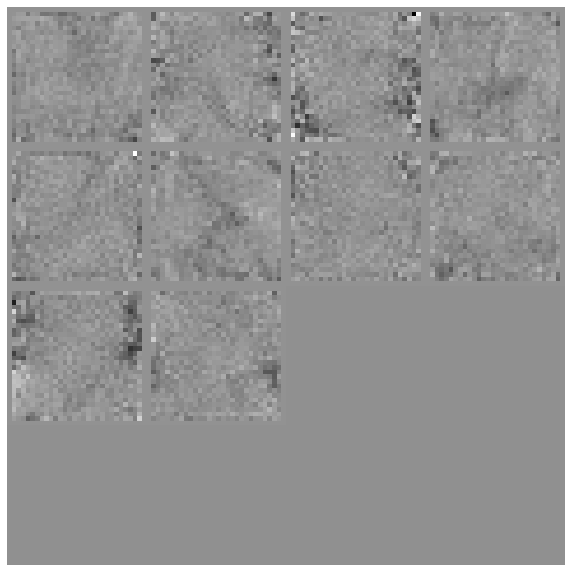

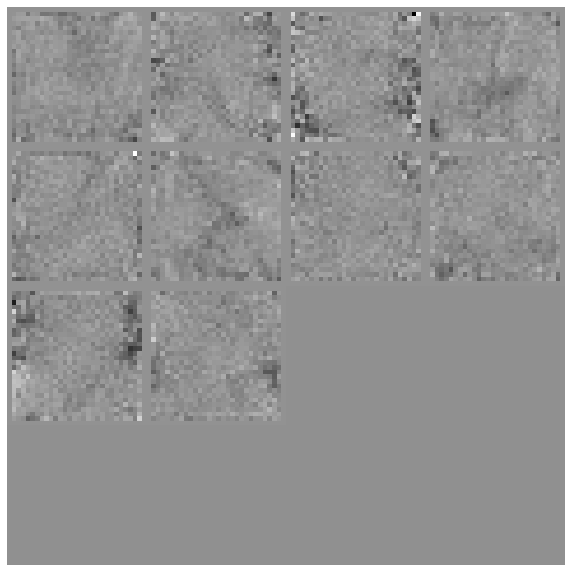

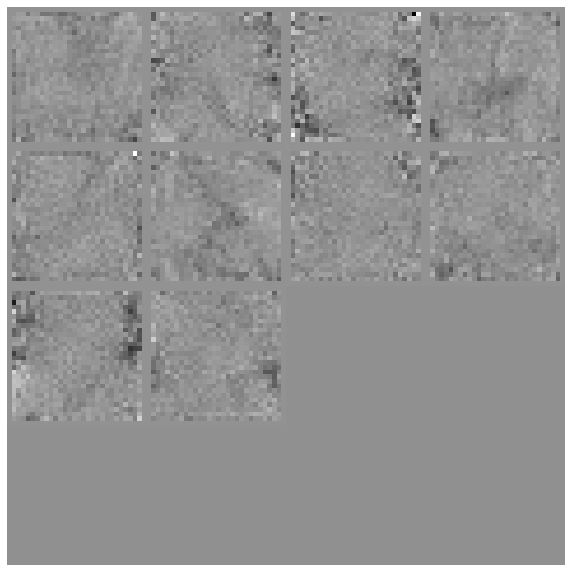

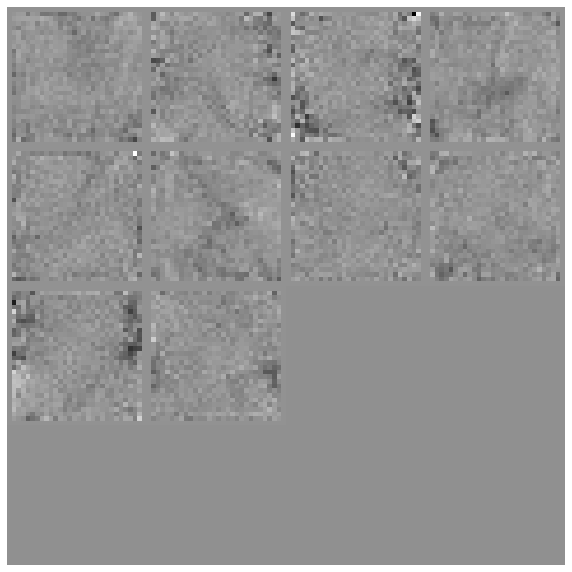

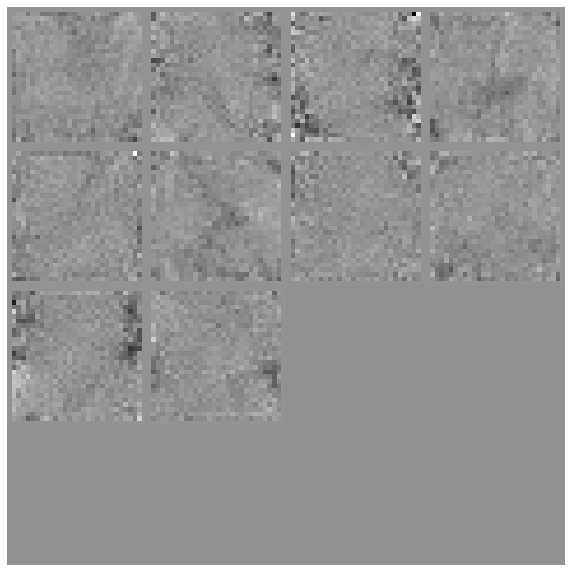

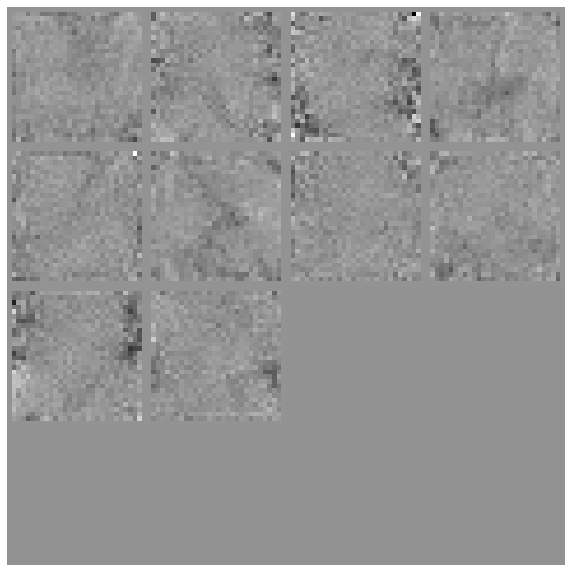

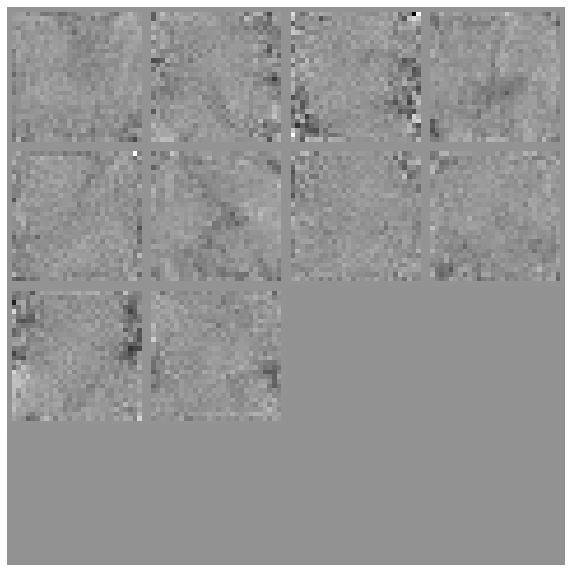

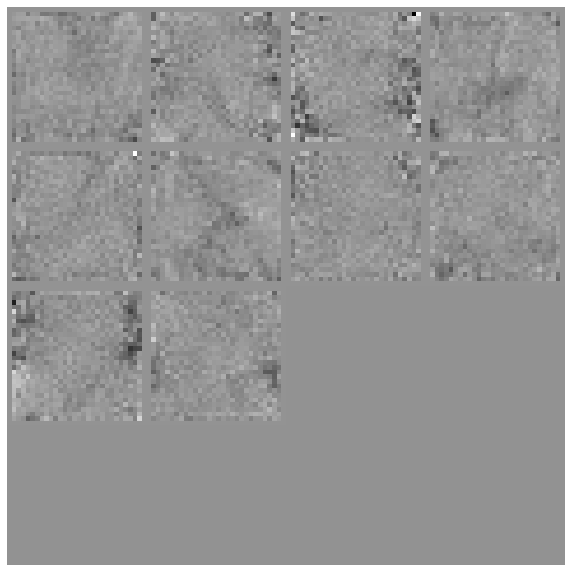

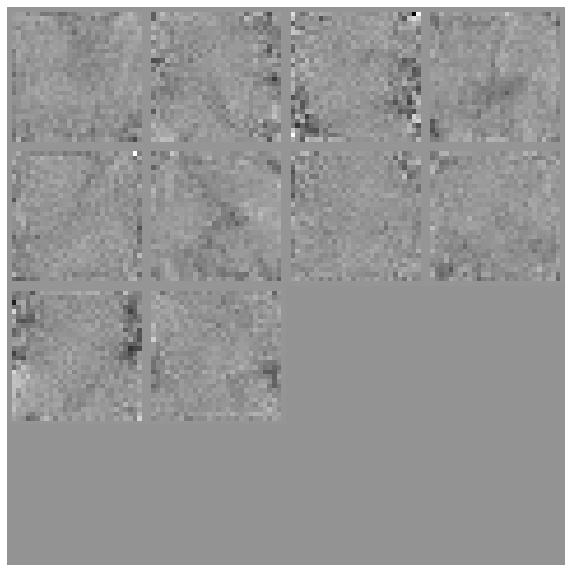

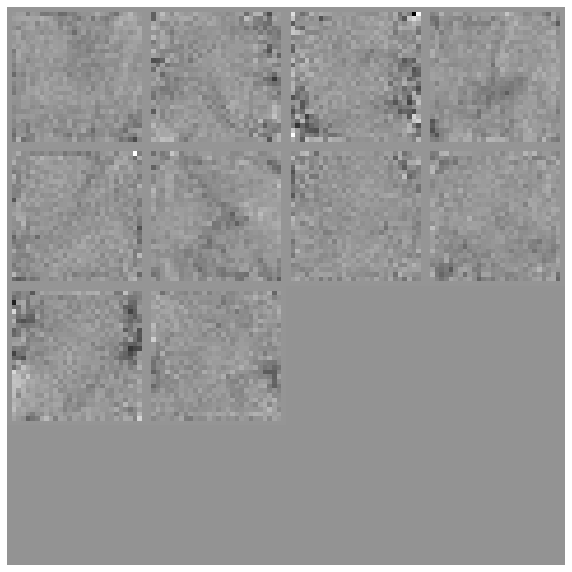

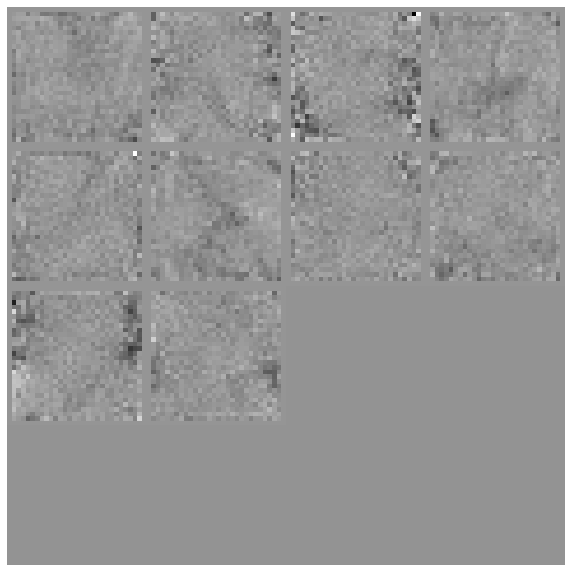

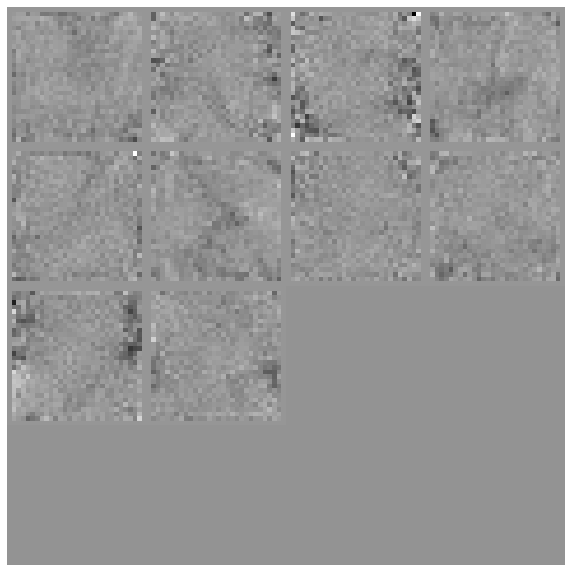

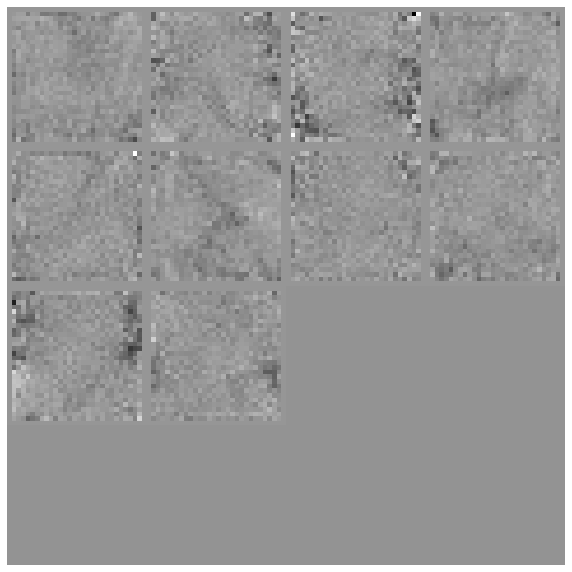

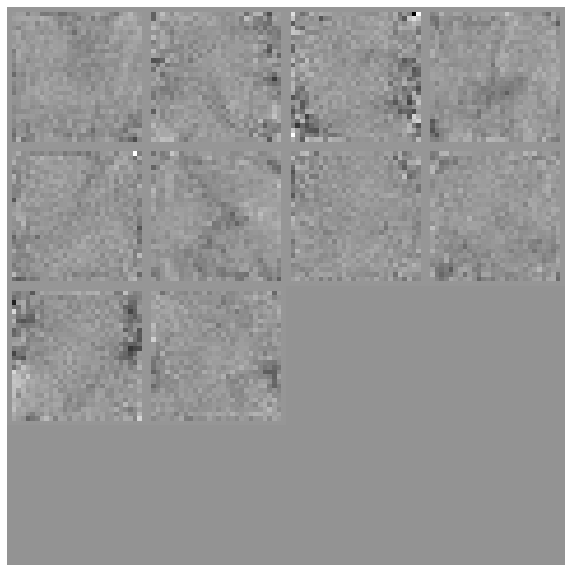

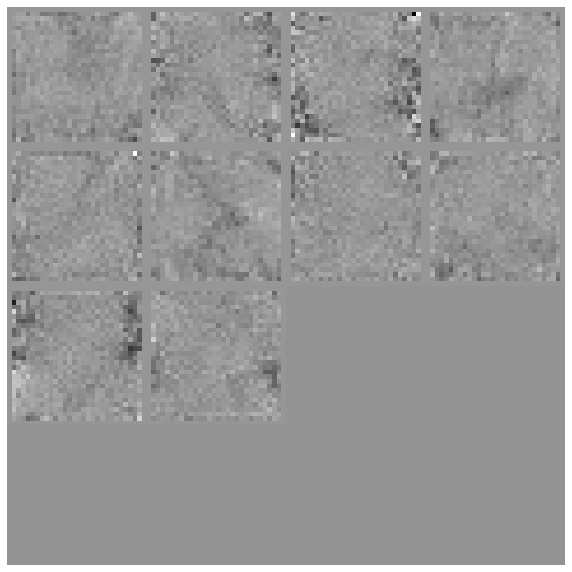

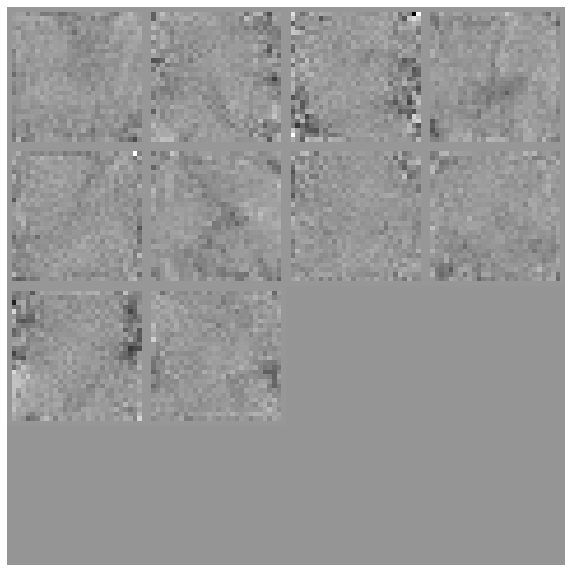

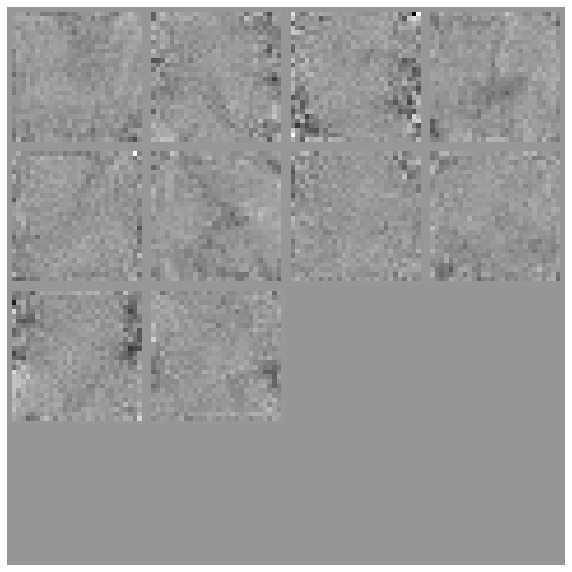

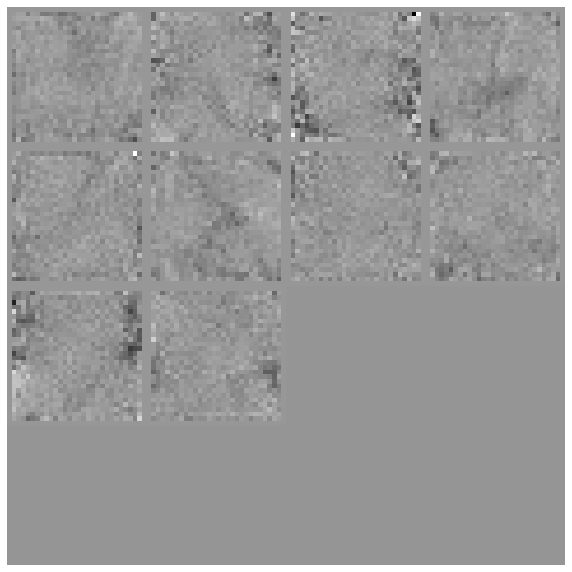

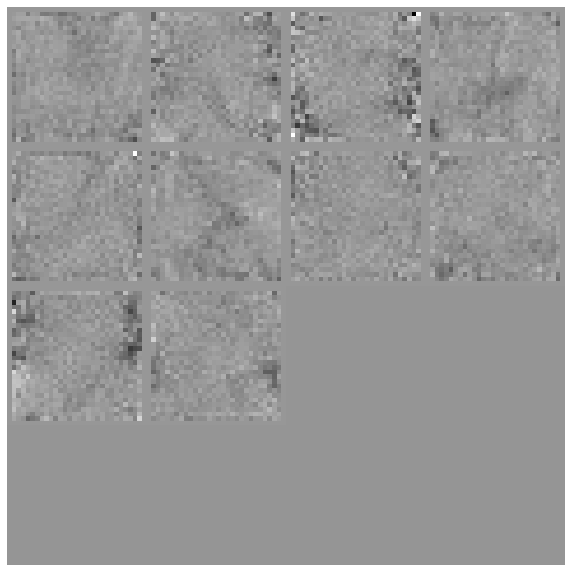

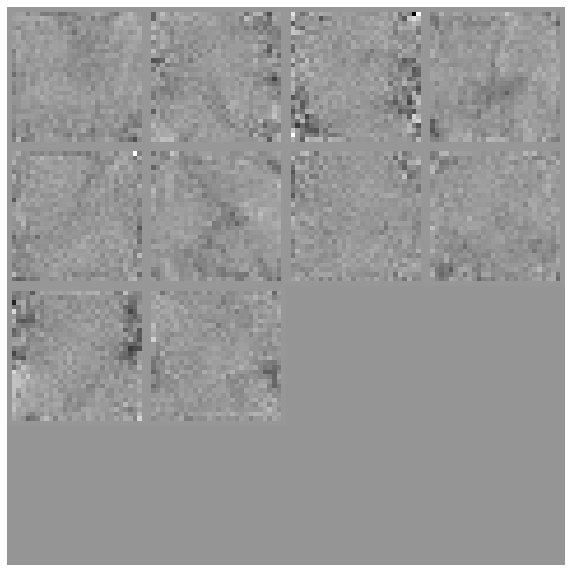

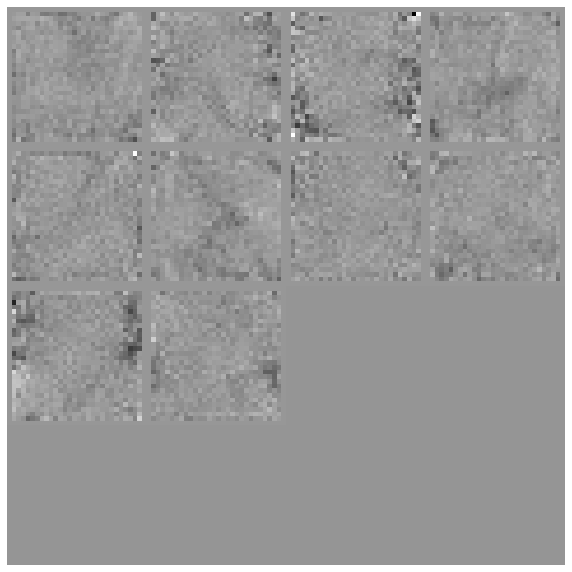

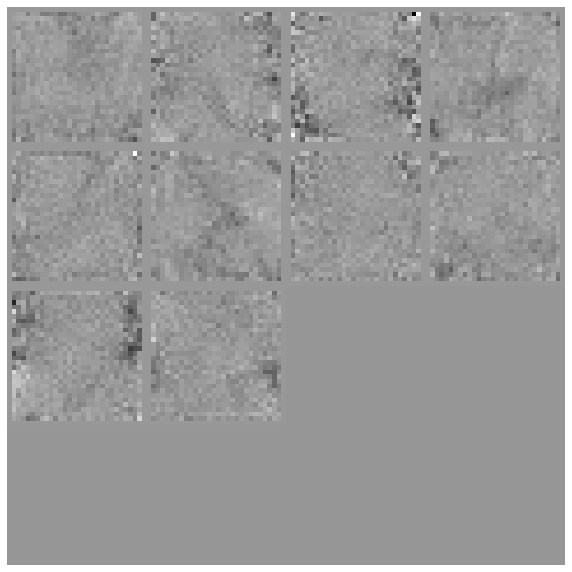

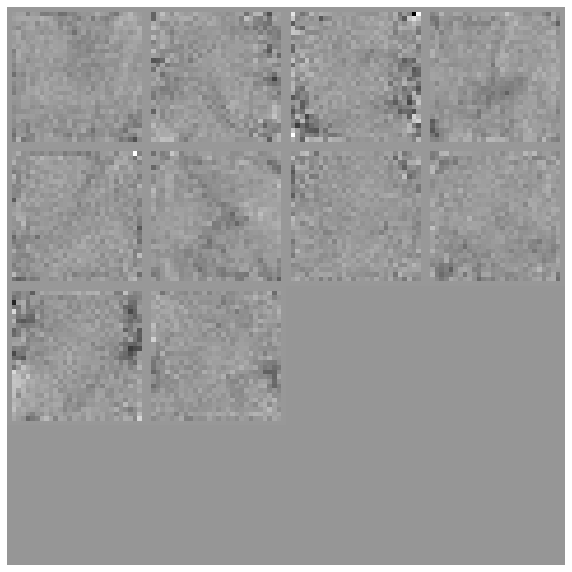

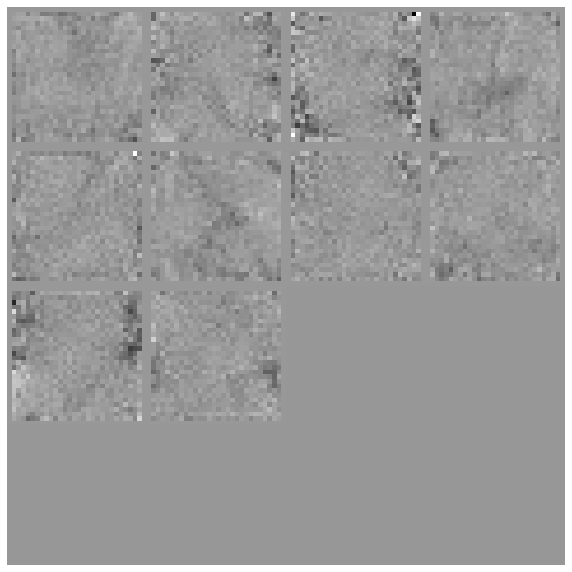

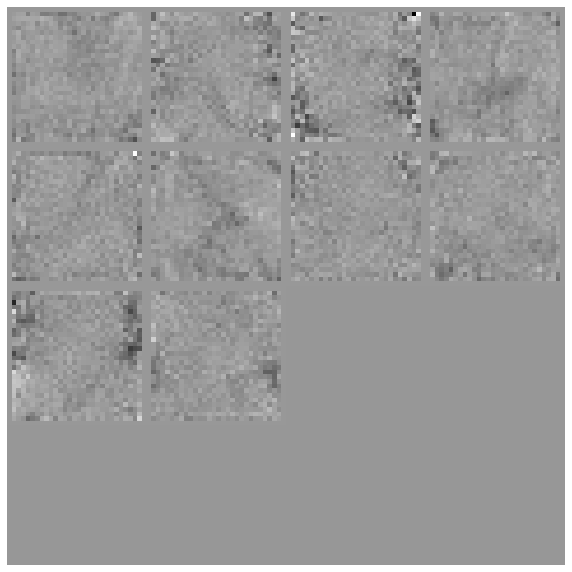

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024 #1000 images at a time
c.epochs = 100000  #run it 100000 times at a time

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  #optimizer upadtes the variable w. lr means learning rate

for i in range(c.epochs):

    x,y = get_batch('train') 

    loss = cross_entropy(softmax(model(x,w)),y) #softmax makes sure everything matches up

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing